In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv



**The dataset name is Advanced House Price Prediction which is taken from kaggle.**

In [ ]:
dataset = pd.read_csv('train.csv')
dataset.shape

(1460, 81)

In [ ]:
dataset.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **First Step is to do Data Analysis**

-> Analysis should be done for both train and test data. Here we will be only showing that how we should do analysis.

**There are various things which we can analyse - **

-> Missing values

-> Numerical and Categorical features

-> Distribution of continuos features

-> Visualise relation between independent and dependent features

-> Outliers

**Missing Values**

In [ ]:
# printing features with nan value

missing_features = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>0]
for feature in missing_features:
  print(feature)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


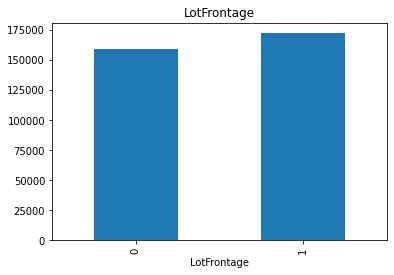

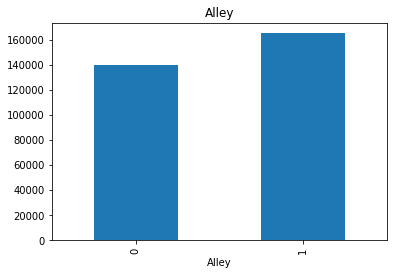

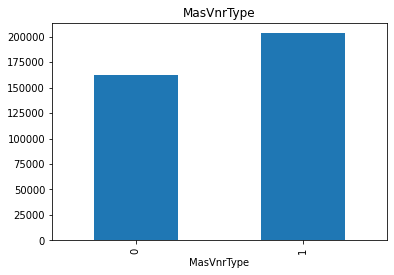

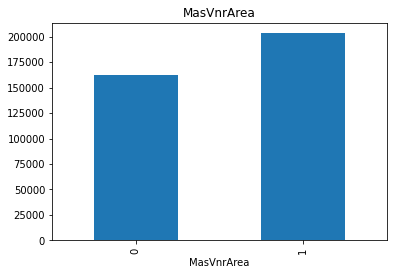

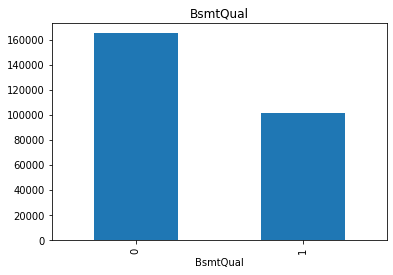

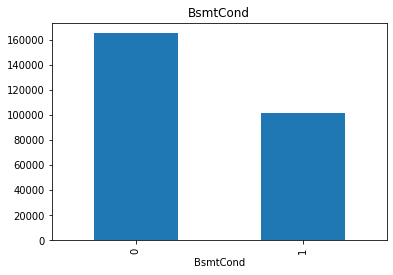

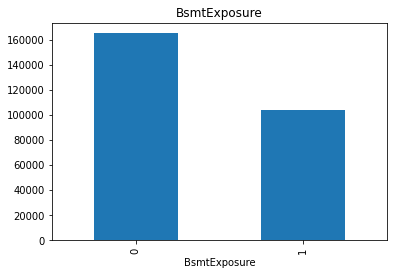

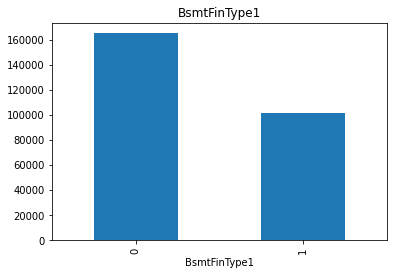

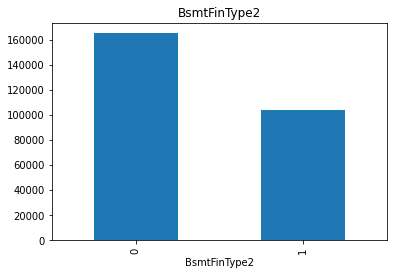

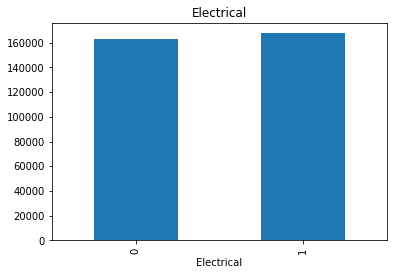

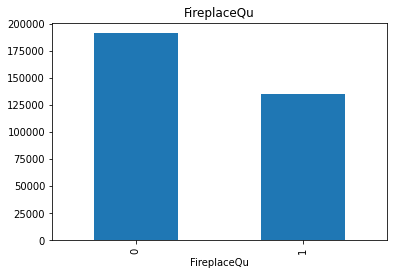

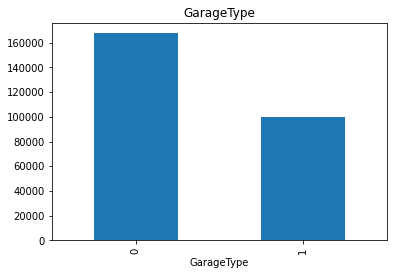

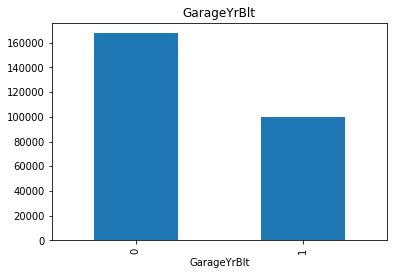

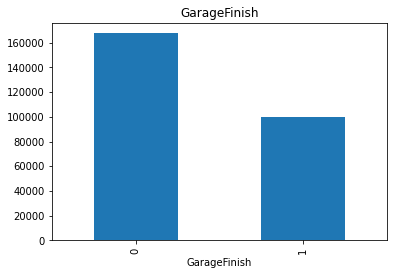

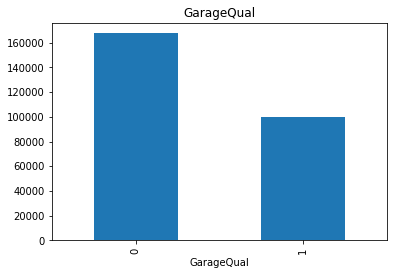

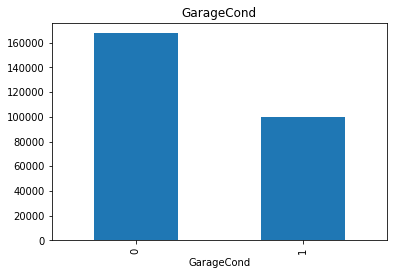

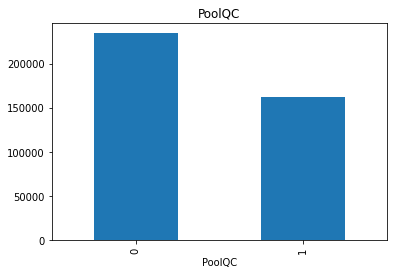

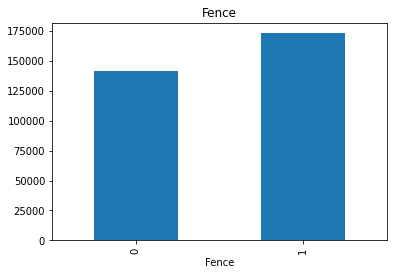

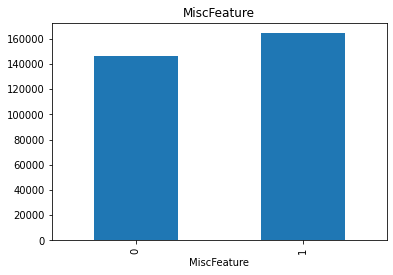

In [ ]:
# There are so many missing values so we will handle missing value in feature engineering part.

# Finding the relationship between missing values and dependent variables

for feature in missing_features:
  data=dataset.copy()
  data[feature]=np.where(data[feature].isnull(),1,0)
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(feature)
  plt.show()

**Numerical features**

In [ ]:
# Printing numerical features

num_features = dataset.columns[dataset.dtypes!='O']
print(len(num_features))

for feature in num_features:
  print(feature)

38
Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


-> Numerical features are generally - 

1) Date-time features

2) Discrete features

3) continuous features

Now Analysing all 2 features-

In [ ]:
# date-time features(temporal variable)

dt_feature = [feature for feature in num_features if 'Year' in feature or 'Yr' in feature]
dt_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

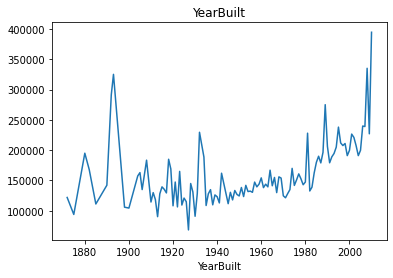

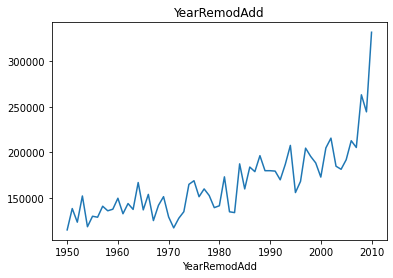

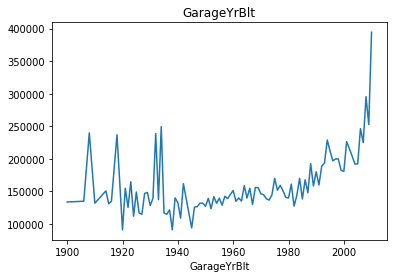

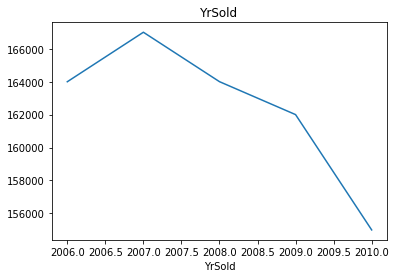

In [ ]:
# finding relationship between dt_feature and dependent variable

for feature in dt_feature:
  data=dataset.copy()

  data.groupby(feature)['SalePrice'].median().plot()
  plt.title(feature)
  plt.show()

In [ ]:
for feature in dt_feature:
  print(feature,len(dataset[feature].unique()))

YearBuilt 112
YearRemodAdd 61
GarageYrBlt 98
YrSold 5


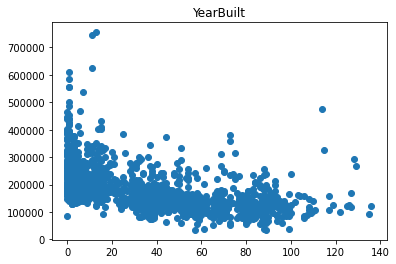

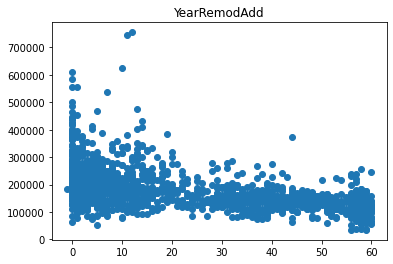

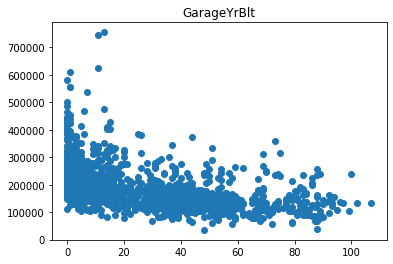

In [ ]:
# Now we will find relationship between the differnce between YrSold and other dt_features with SalePrice

for feature in dt_feature:
  if feature!='YrSold':
    data=dataset.copy()
    data[feature]=data['YrSold']-data[feature]
    plt.scatter(data[feature],data['SalePrice'])
    plt.title(feature)
    plt.show()

-> Discrete features

In [ ]:
for feature in num_features:
  print(feature,len(dataset[feature].unique()))

Id 1460
MSSubClass 15
LotFrontage 111
LotArea 1073
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
MasVnrArea 328
BsmtFinSF1 637
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
TotRmsAbvGrd 12
Fireplaces 4
GarageYrBlt 98
GarageCars 5
GarageArea 441
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
MiscVal 21
MoSold 12
YrSold 5
SalePrice 663


In [ ]:
# Here from above we conclude that the max value of discrete feature is 24(LowQualFinSF) and values higher than this will come in continuous features
# printing discrete features

discrete_feature = [feature for feature in num_features if len(dataset[feature].unique())<25 and feature not in dt_feature+['Id']]
len(discrete_feature)

17

In [ ]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

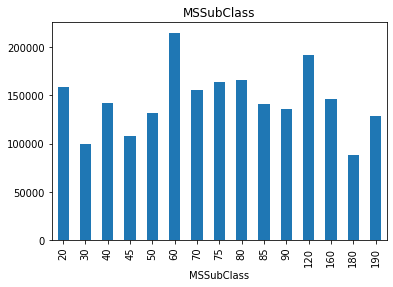

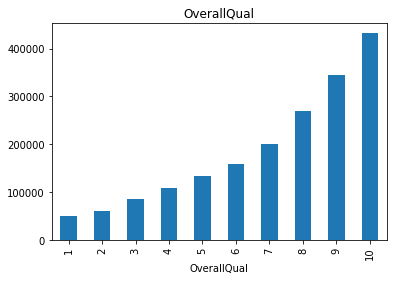

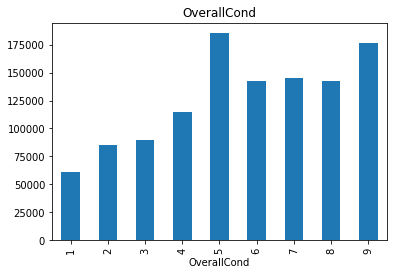

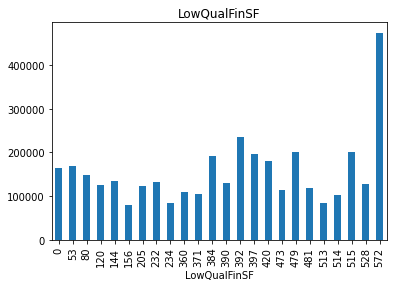

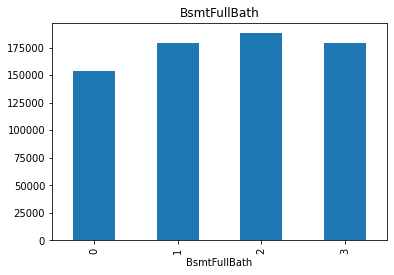

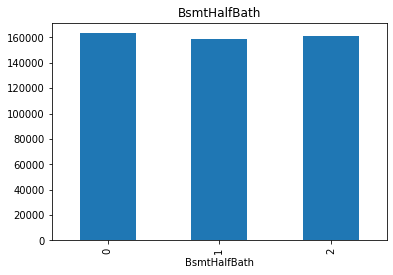

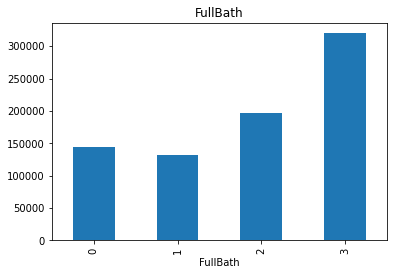

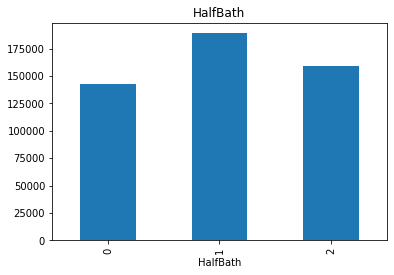

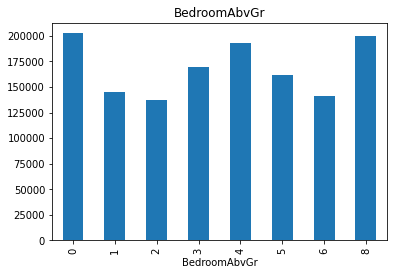

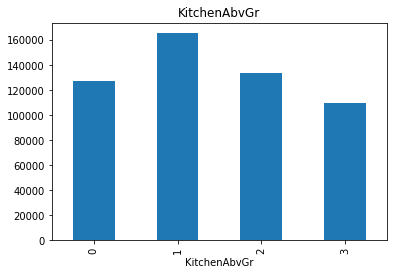

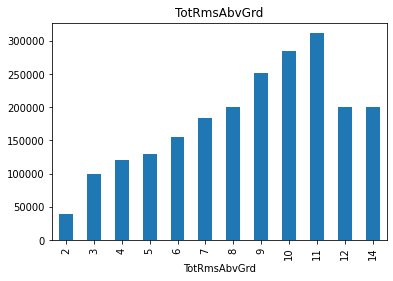

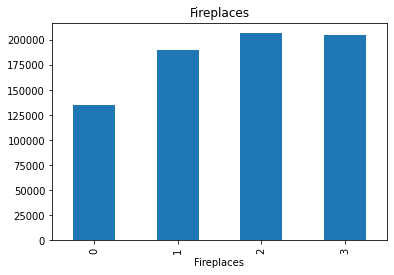

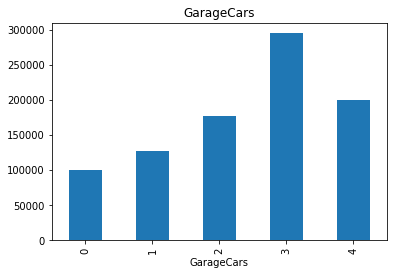

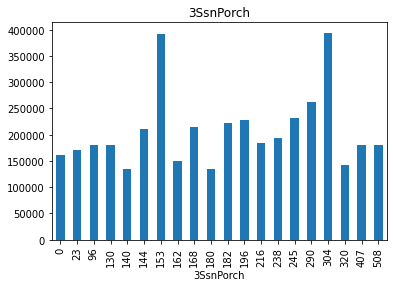

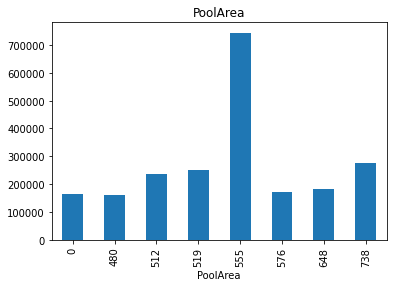

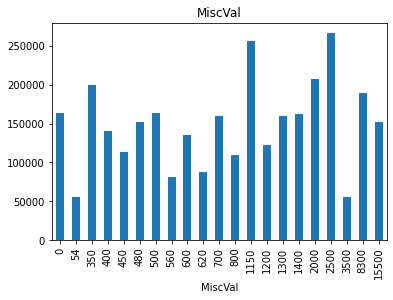

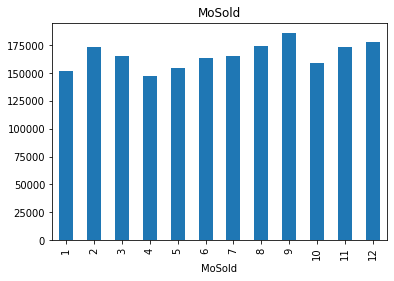

In [ ]:
# finding relationship between discrete feature and SalePrice

for feature in discrete_feature:
  data=dataset.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(feature)
  plt.show()

-> Continuous features

In [ ]:
continuous_feature = [feature for feature in num_features if feature not in discrete_feature+dt_feature+['Id']]
len(continuous_feature)

16

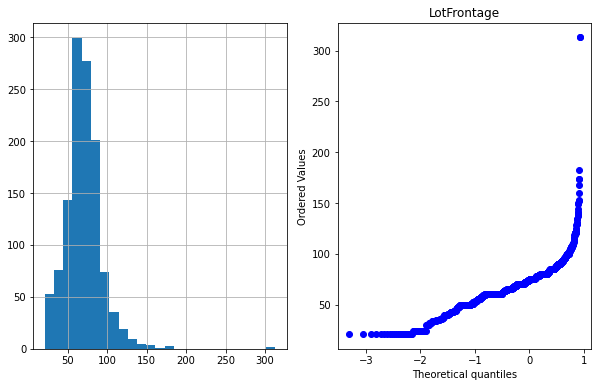

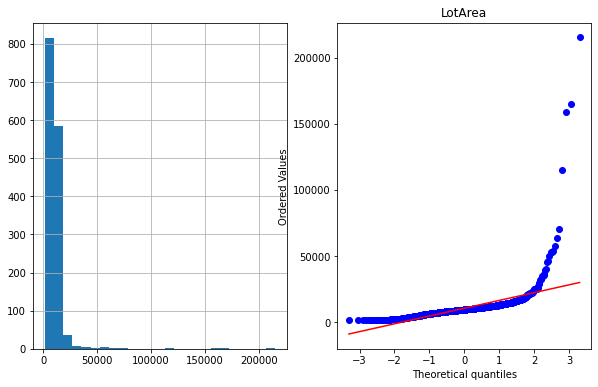

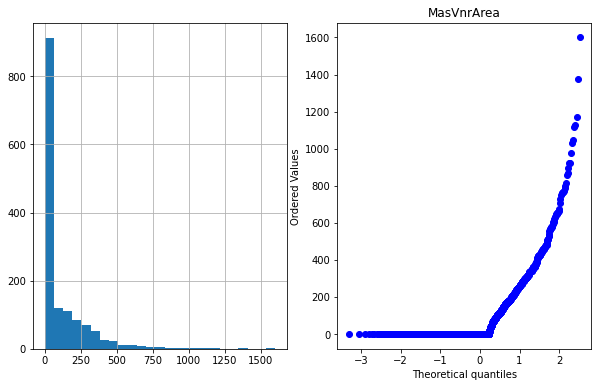

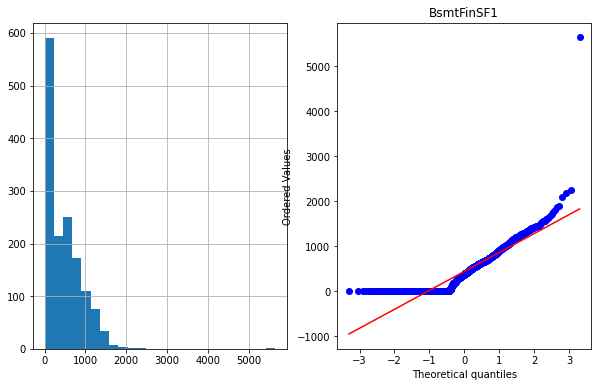

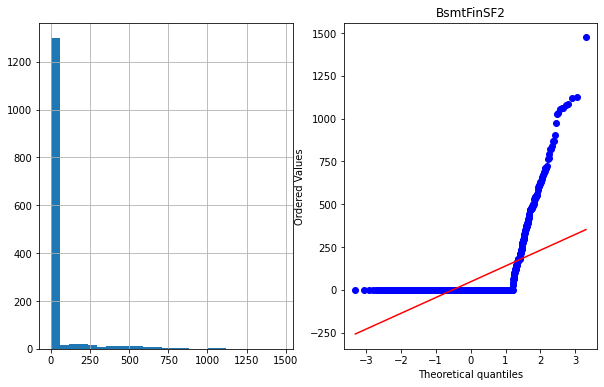

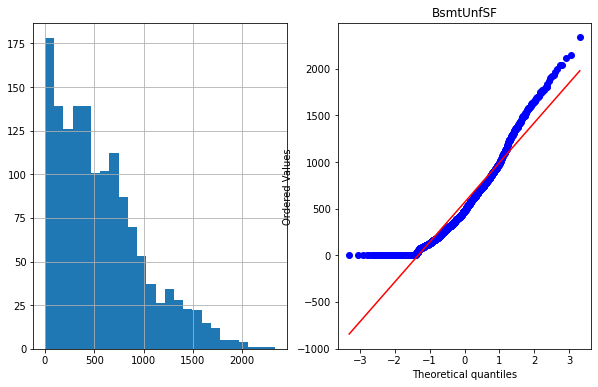

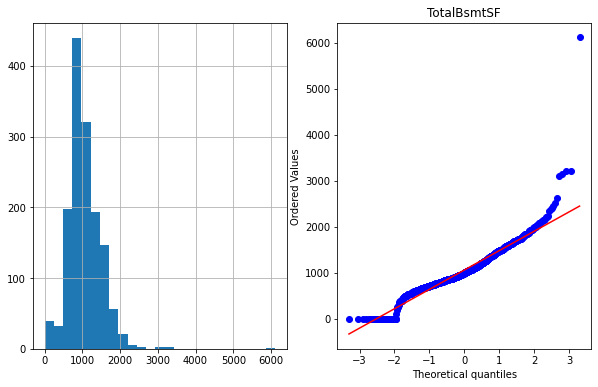

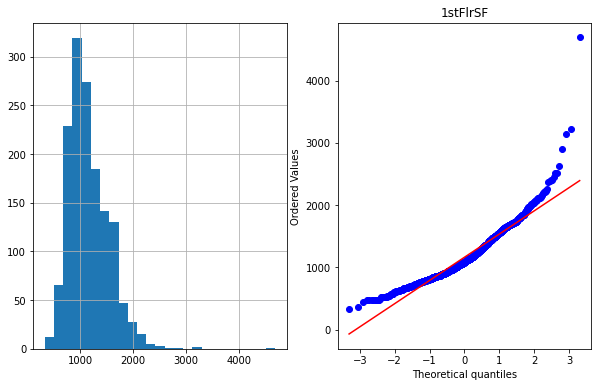

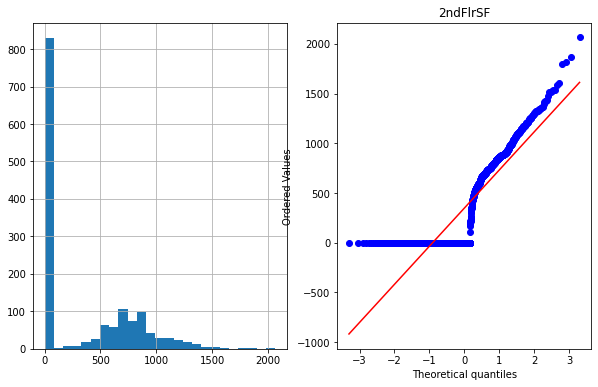

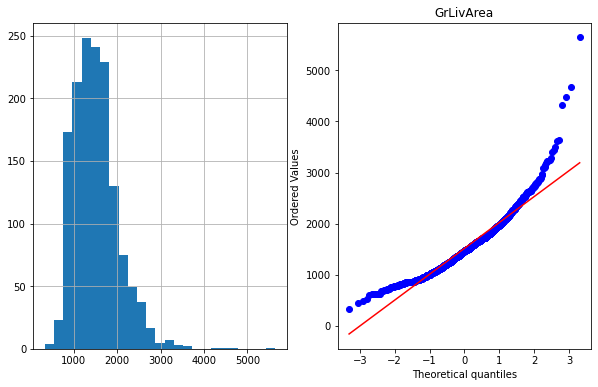

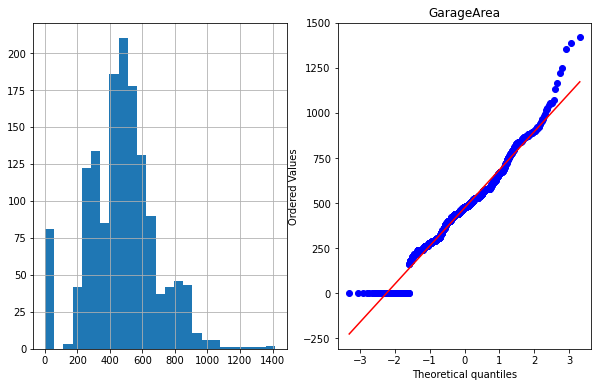

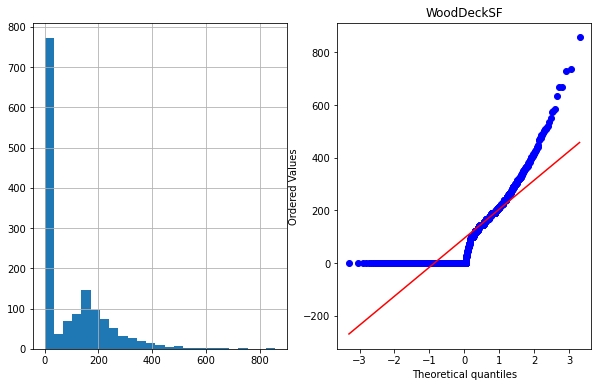

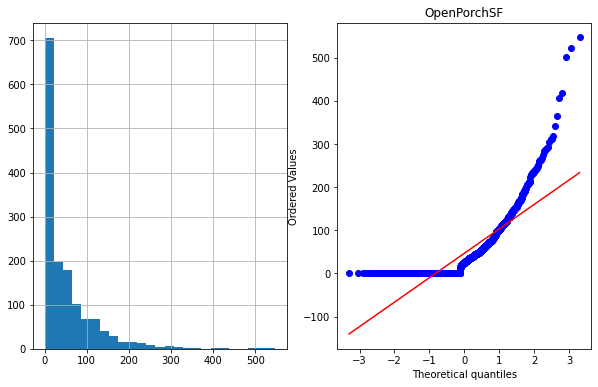

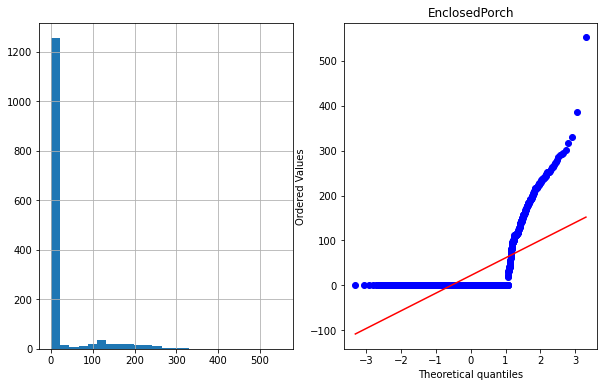

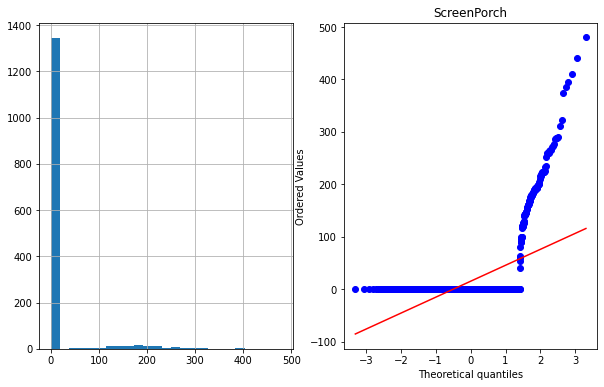

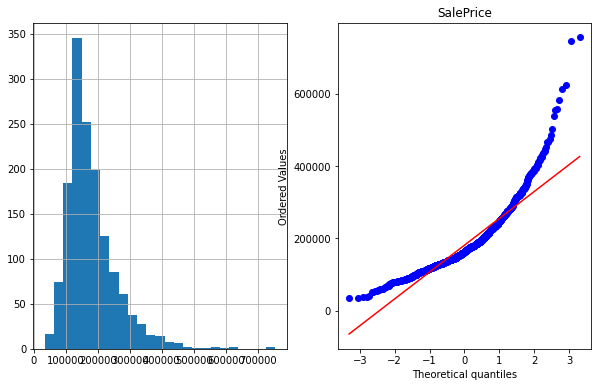

In [ ]:
# for analysing continuous features, we will plot distribution curve by histogram and q-qplot

import scipy.stats as stat
import pylab

def plotting(data,feature):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  data[feature].hist(bins=25)
  plt.subplot(1,2,2)
  stat.probplot(data[feature],dist='norm',plot=pylab)
  plt.title(feature)
  plt.show()

for feature in continuous_feature:
  plotting(dataset,feature)



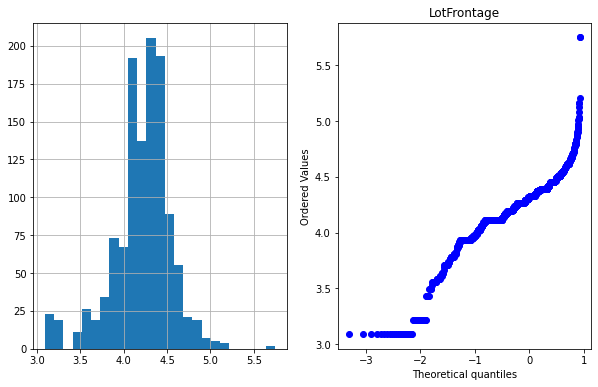

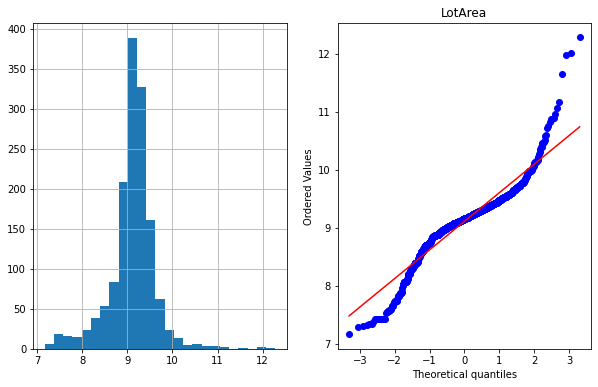

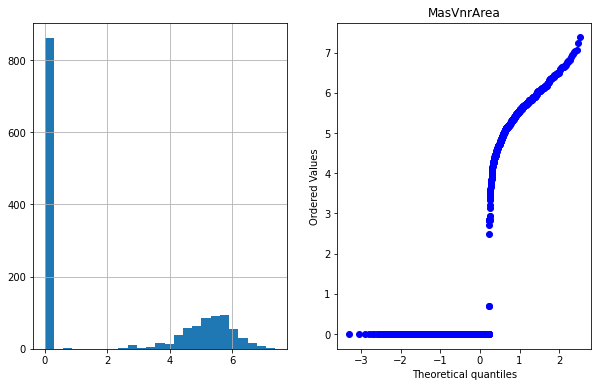

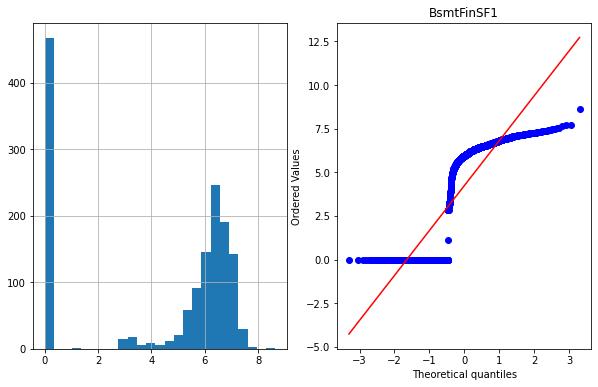

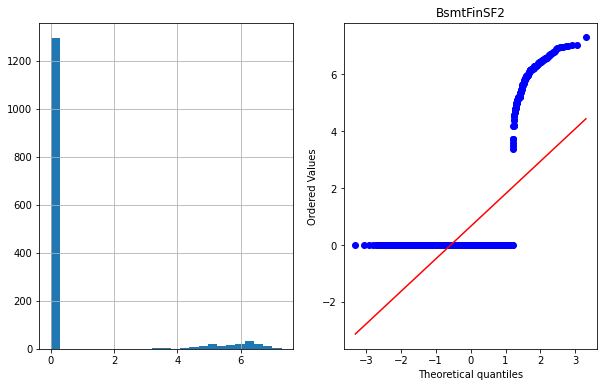

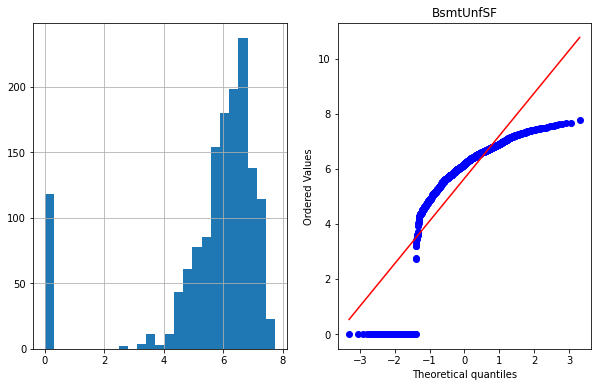

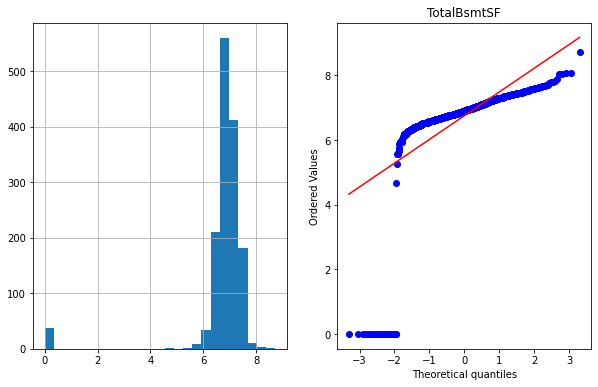

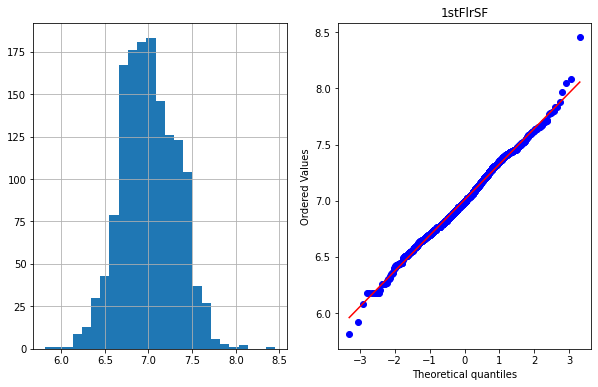

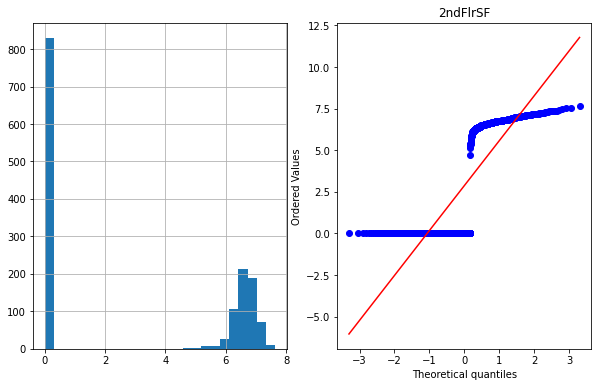

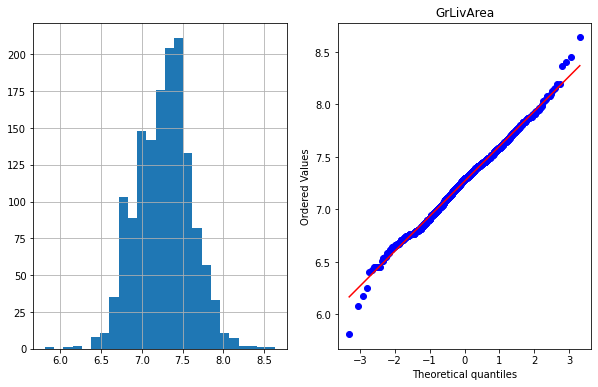

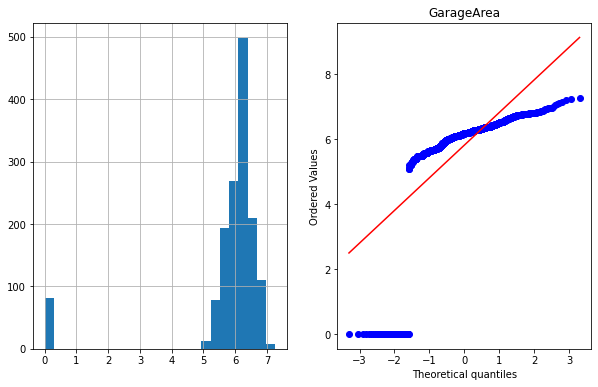

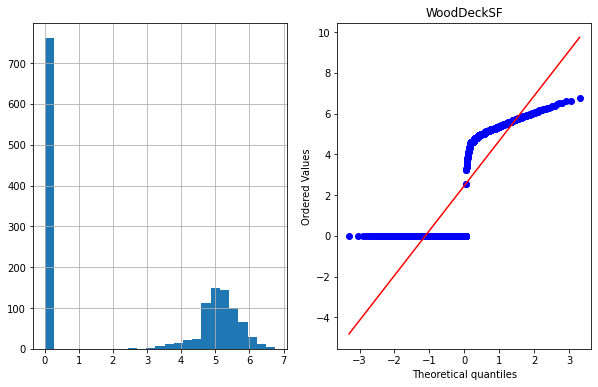

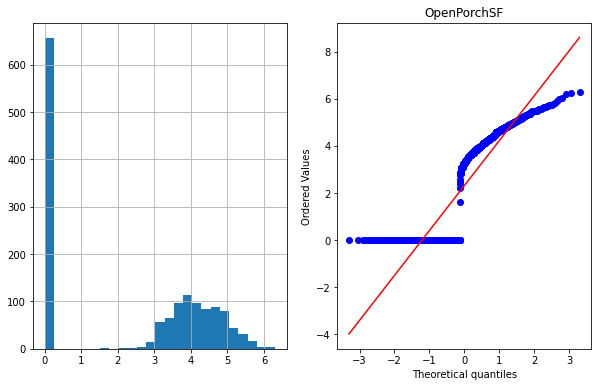

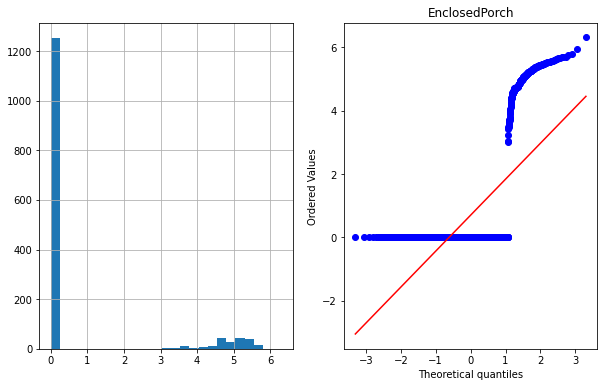

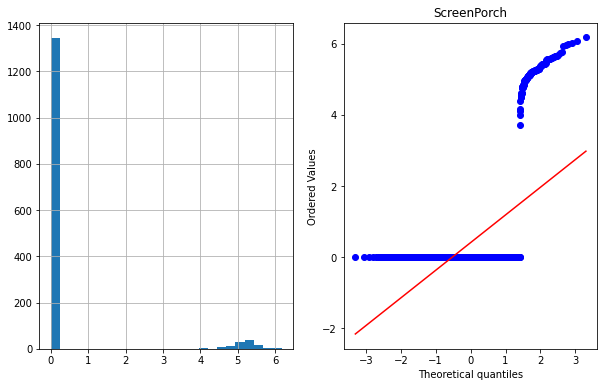

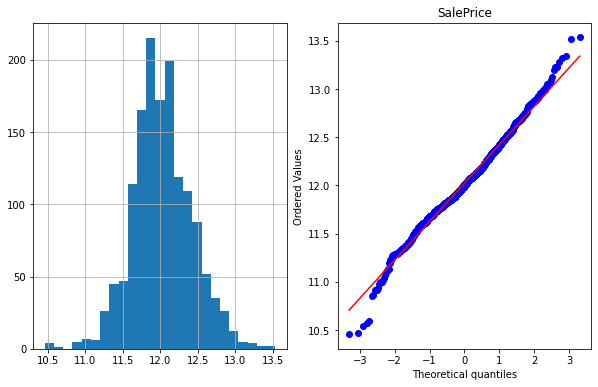

In [ ]:
# As the distribution of various feature are not gaussian , we will try to convert them by suitable transformation techniques like logarithmic,box-cox etc

# logarithmic transformation

for feature in continuous_feature:
  data=dataset.copy()
  data[feature]=np.log1p(data[feature])
  plotting(data,feature)

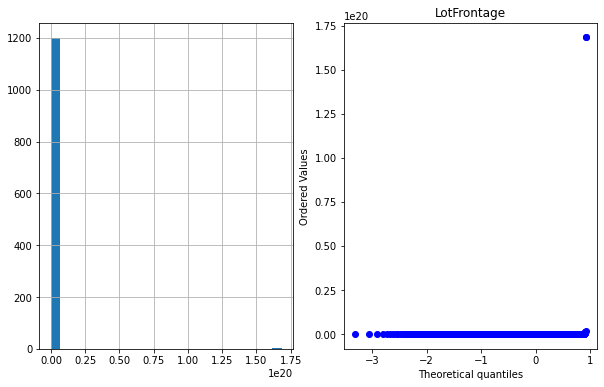

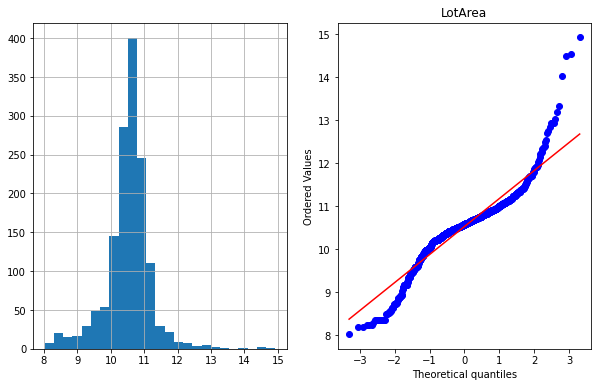

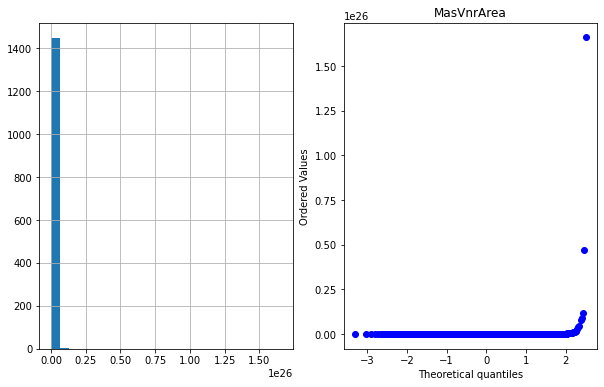

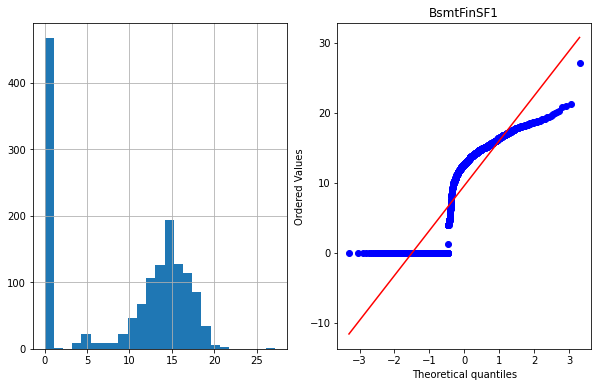

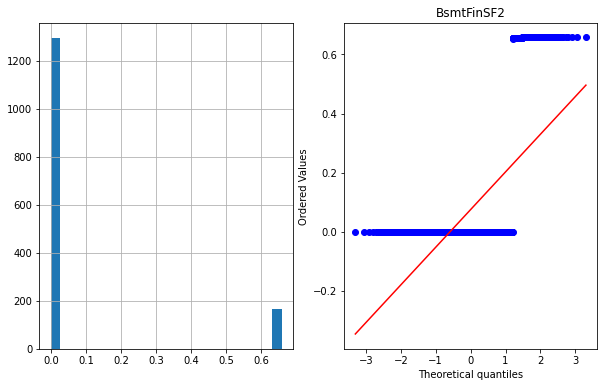

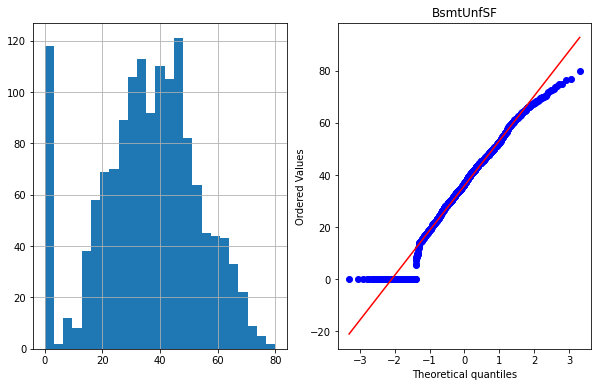

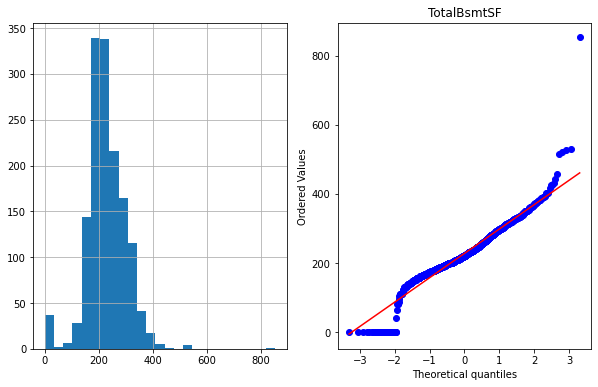

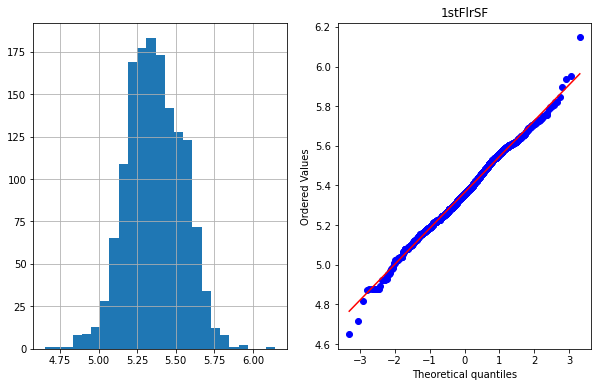

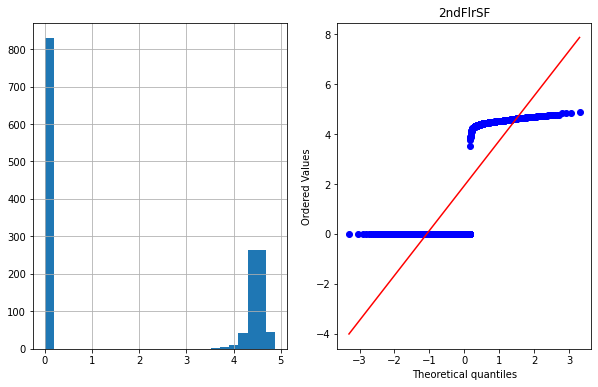

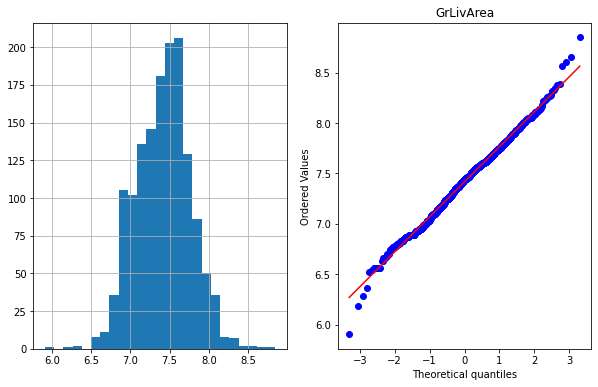

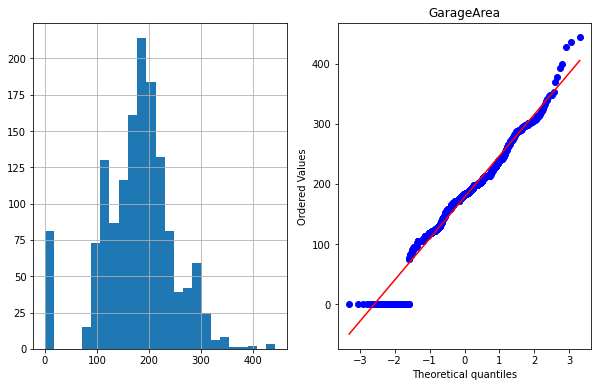

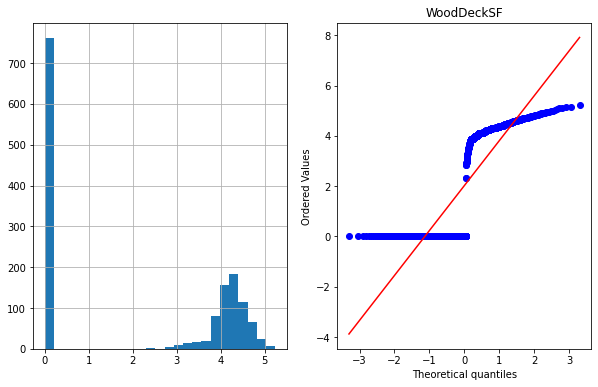

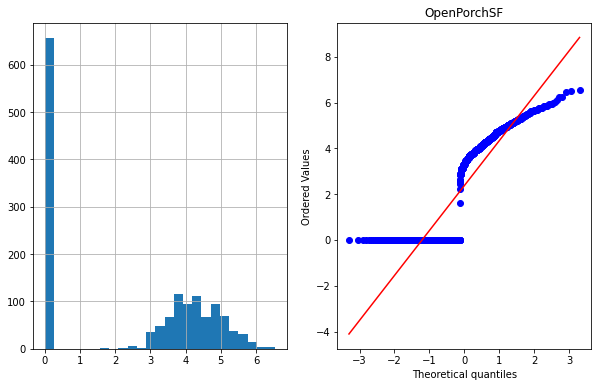

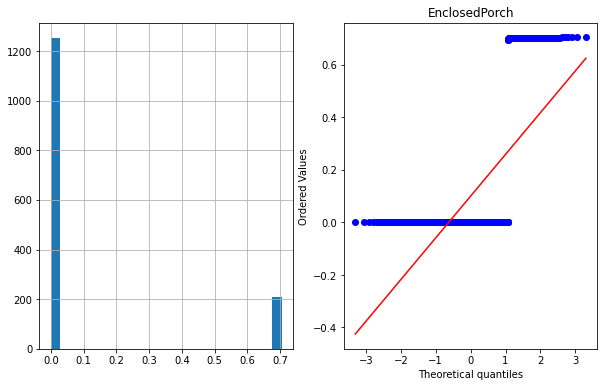

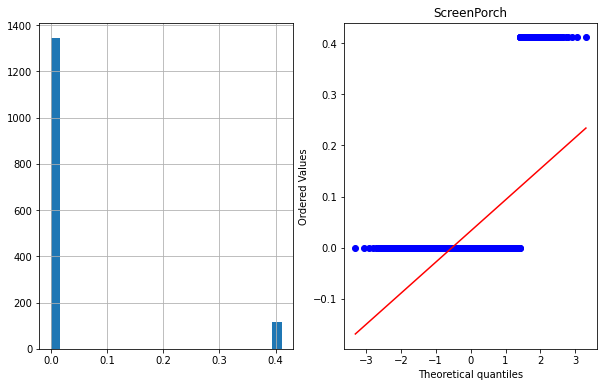

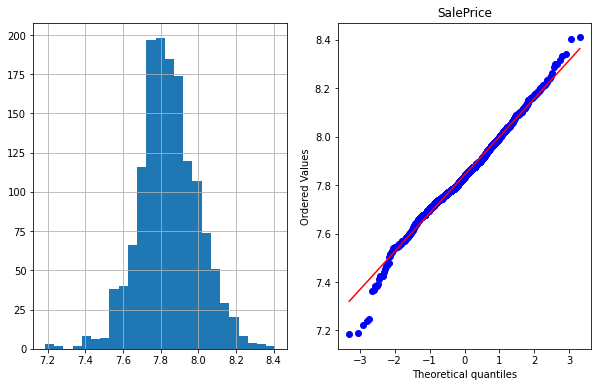

In [ ]:
# box-cox tranformation

for feature in continuous_feature:
  data=dataset.copy()

  data[feature],parameters = stat.boxcox(data[feature]+1)
  plotting(data,feature)

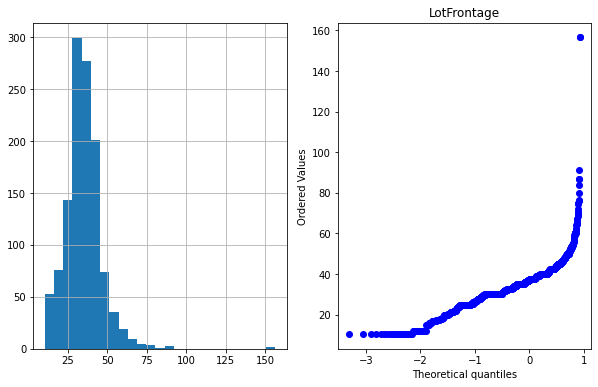

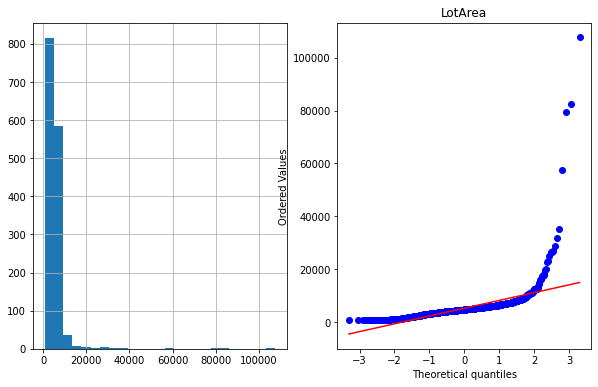

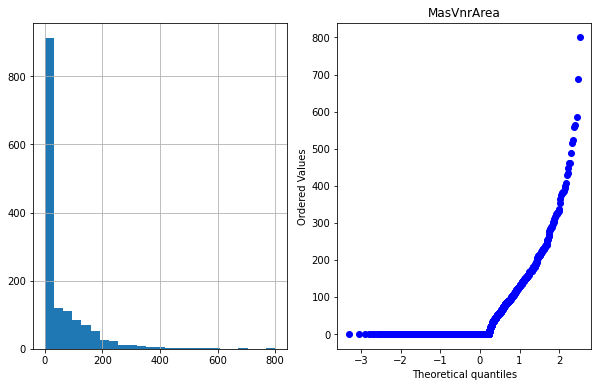

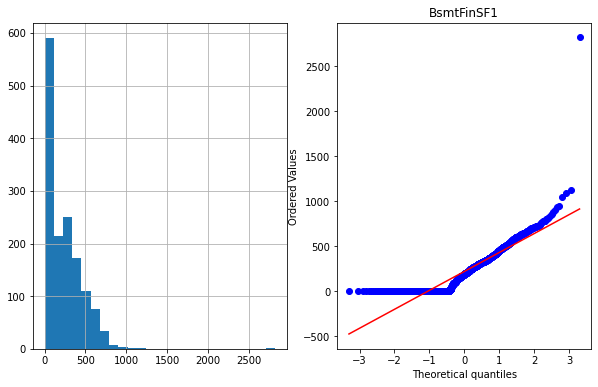

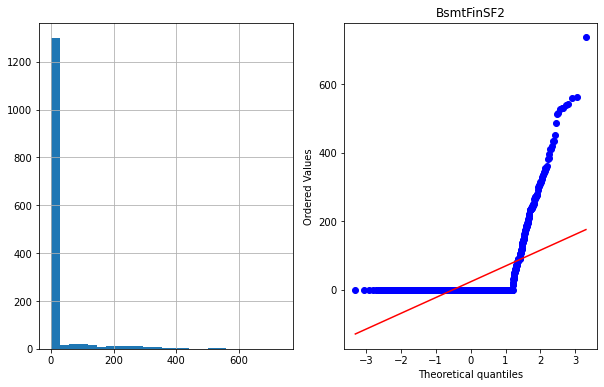

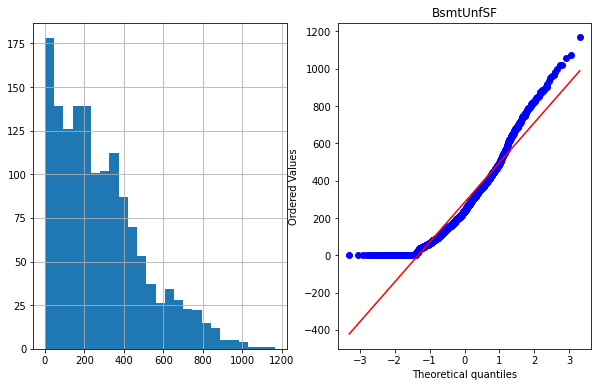

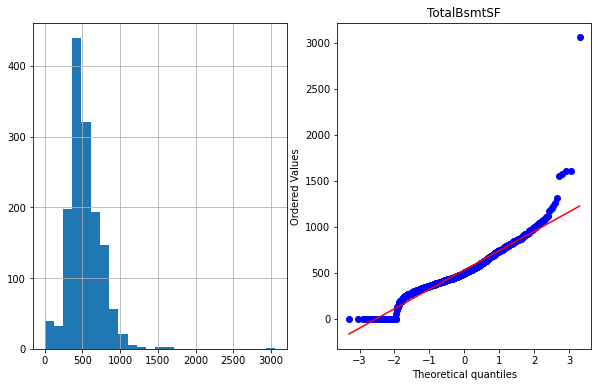

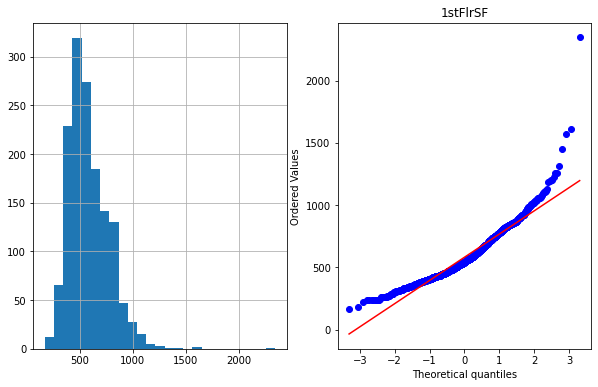

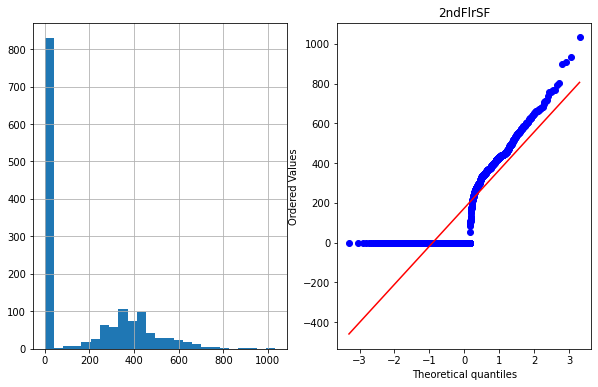

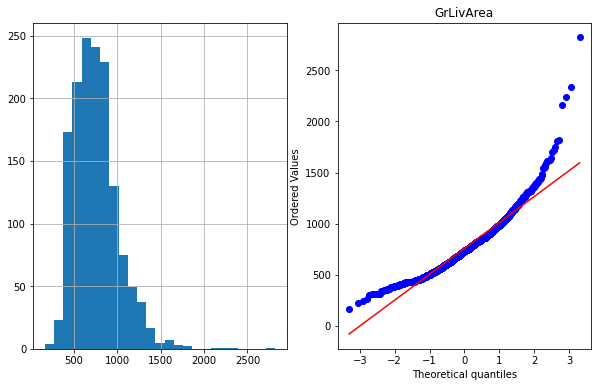

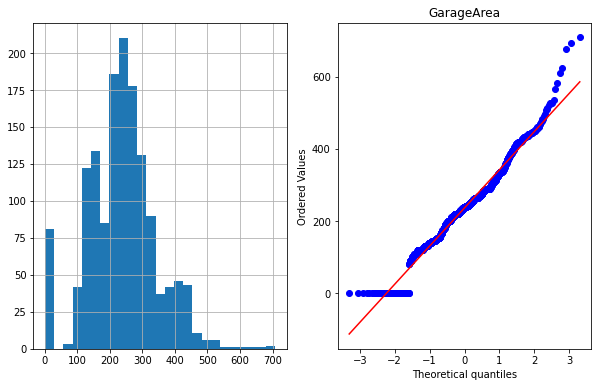

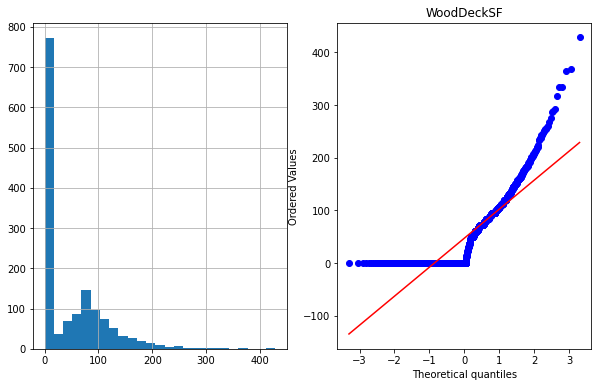

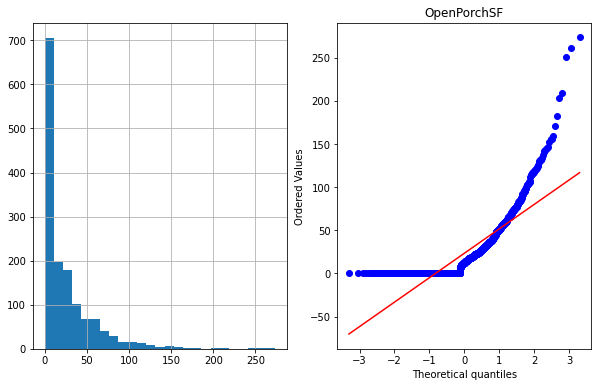

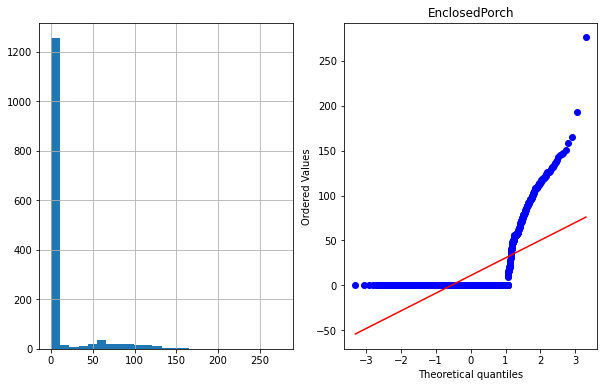

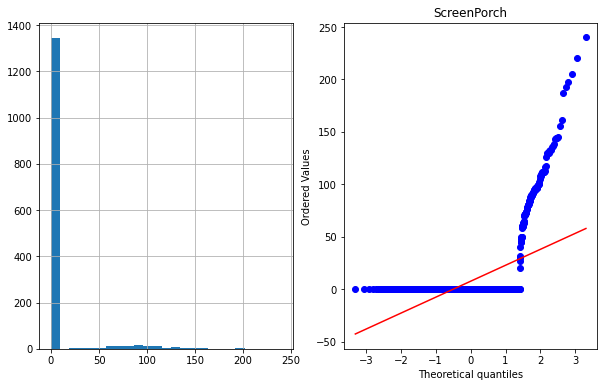

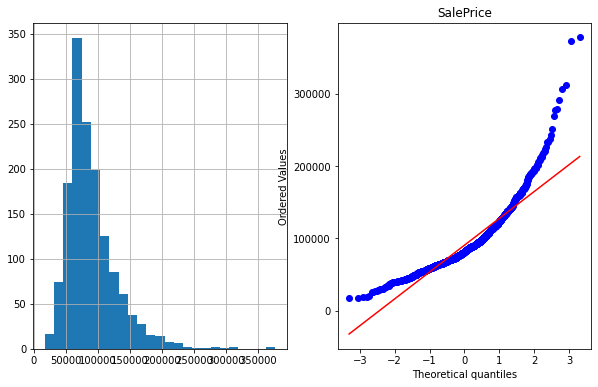

In [ ]:
# square root transformation

for feature in continuous_feature:
  data=dataset.copy()

  data[feature]=data[feature]**1/2
  plotting(data,feature)

**Outliers**

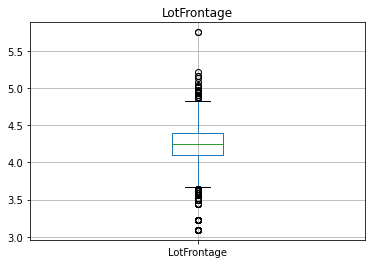

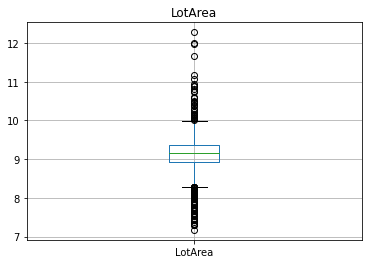

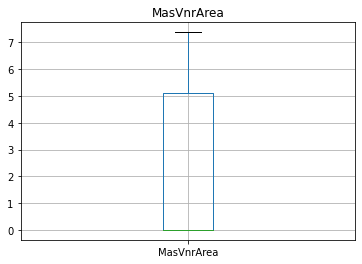

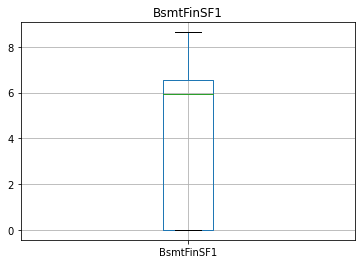

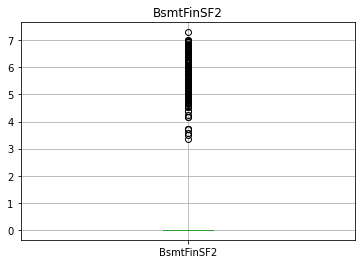

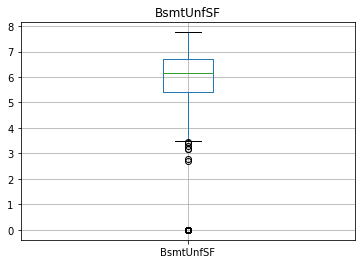

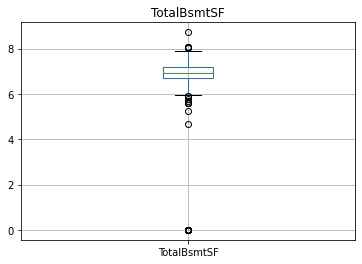

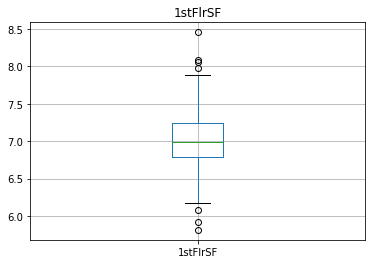

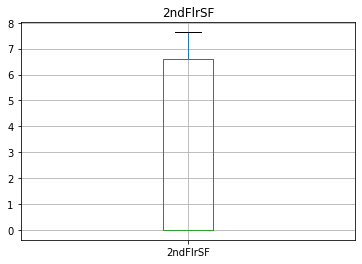

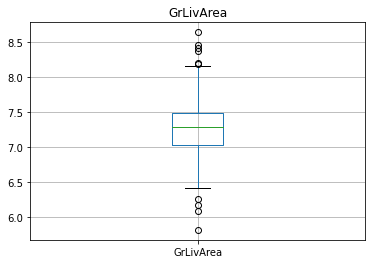

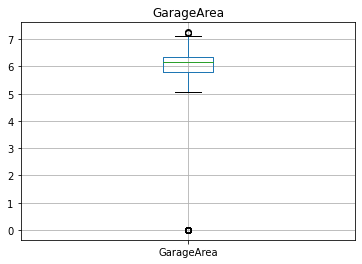

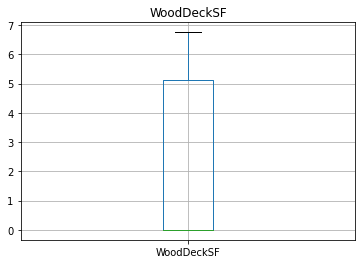

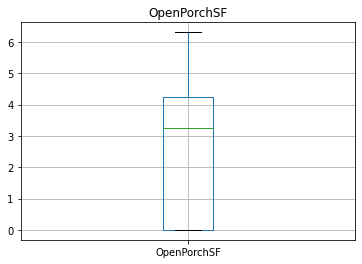

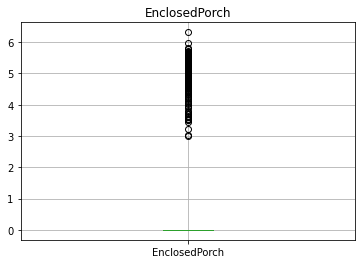

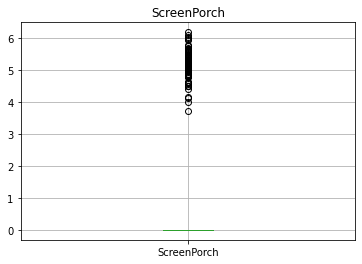

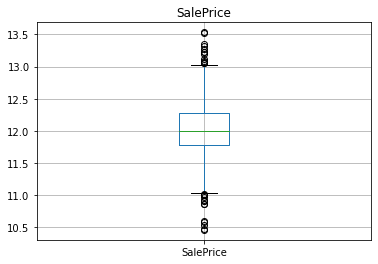

In [ ]:
# Now we will find the outliers by box plot

for feature in continuous_feature:
  data=dataset.copy()
  data[feature]=np.log1p(data[feature])
  data.boxplot(column=feature)
  plt.title(feature)
  plt.show()

**Categorical Features**

In [ ]:
# printing categorical feature

cat_feature = dataset.columns[dataset.dtypes == 'O']
len(cat_feature)

43

In [ ]:
for feature in cat_feature:
  print(feature,'-',len(dataset[feature].unique()))

MSZoning - 5
Street - 2
Alley - 3
LotShape - 4
LandContour - 4
Utilities - 2
LotConfig - 5
LandSlope - 3
Neighborhood - 25
Condition1 - 9
Condition2 - 8
BldgType - 5
HouseStyle - 8
RoofStyle - 6
RoofMatl - 8
Exterior1st - 15
Exterior2nd - 16
MasVnrType - 5
ExterQual - 4
ExterCond - 5
Foundation - 6
BsmtQual - 5
BsmtCond - 5
BsmtExposure - 5
BsmtFinType1 - 7
BsmtFinType2 - 7
Heating - 6
HeatingQC - 5
CentralAir - 2
Electrical - 6
KitchenQual - 4
Functional - 7
FireplaceQu - 6
GarageType - 7
GarageFinish - 4
GarageQual - 6
GarageCond - 6
PavedDrive - 3
PoolQC - 4
Fence - 5
MiscFeature - 5
SaleType - 9
SaleCondition - 6


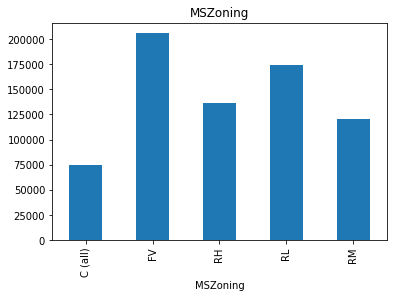

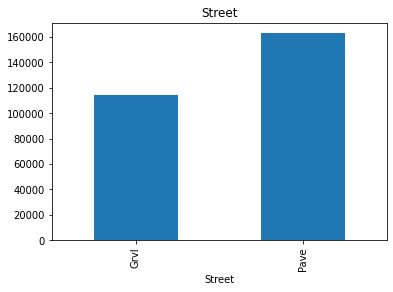

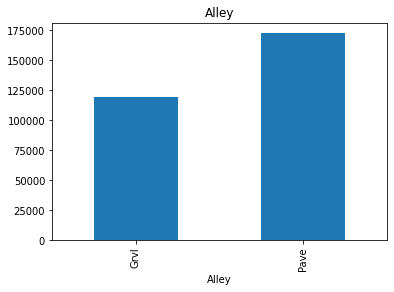

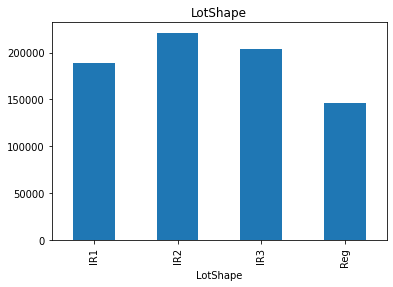

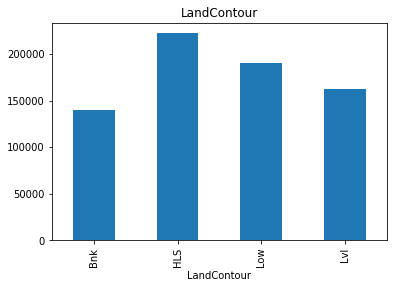

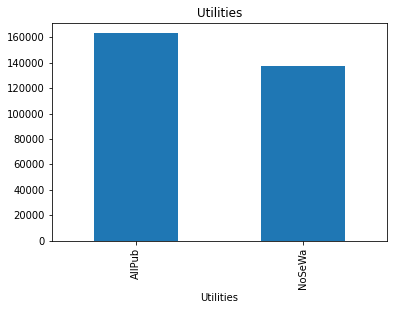

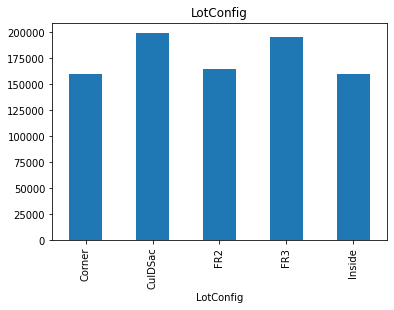

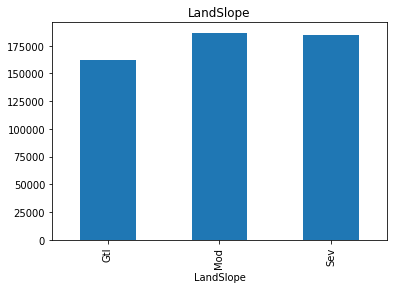

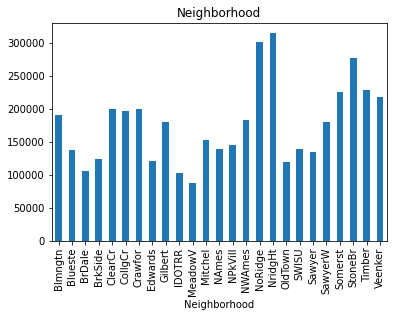

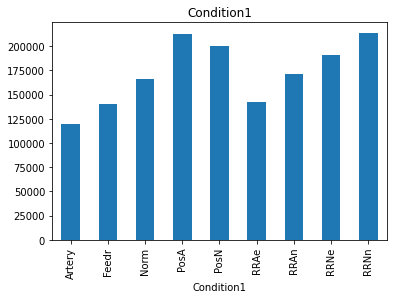

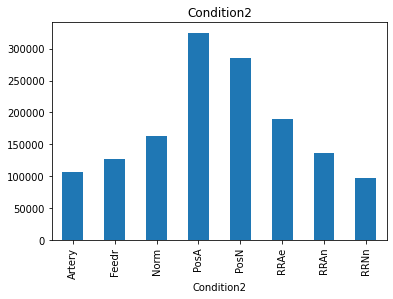

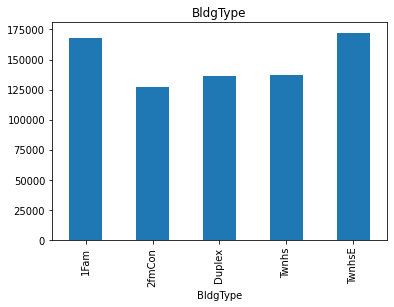

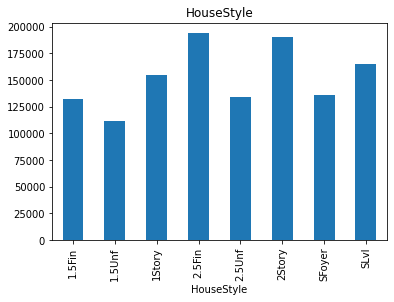

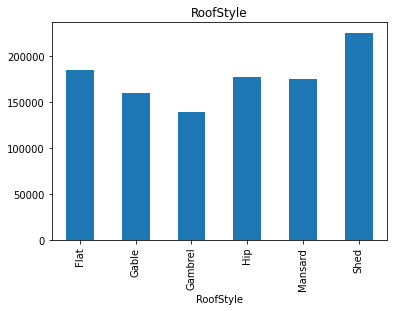

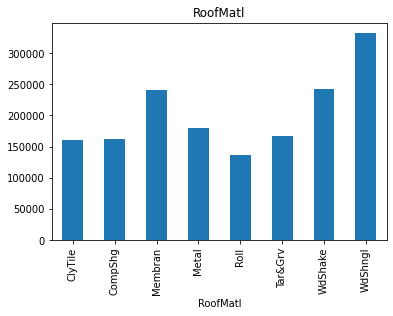

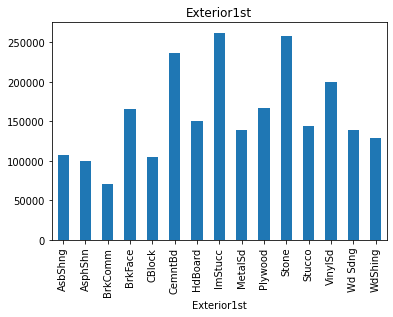

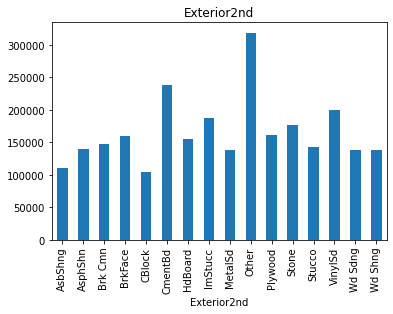

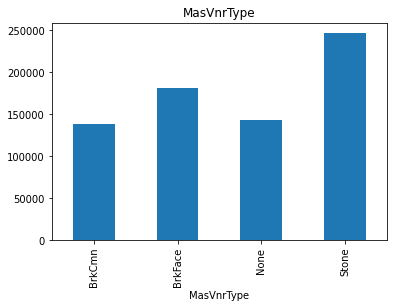

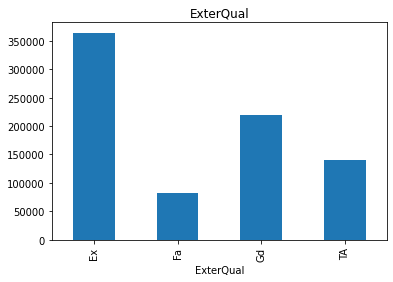

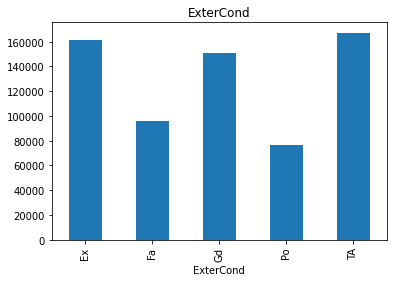

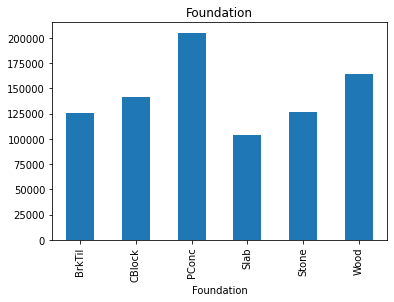

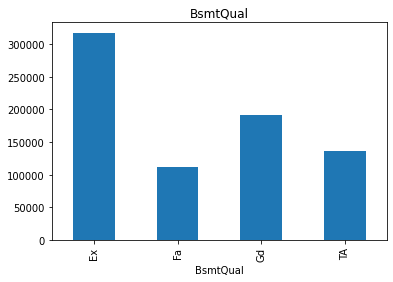

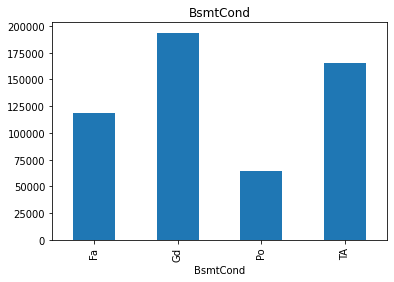

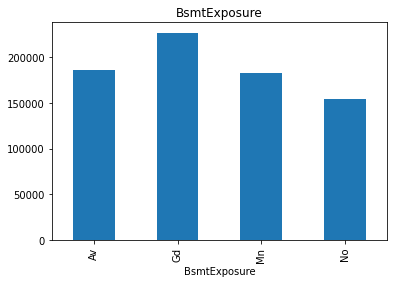

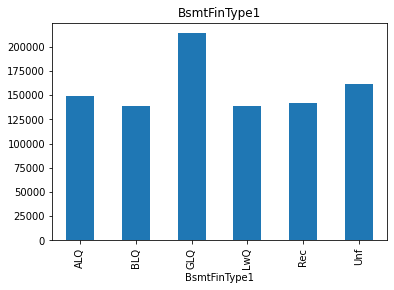

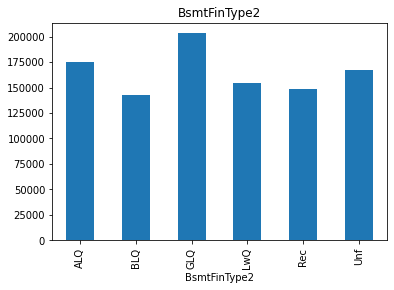

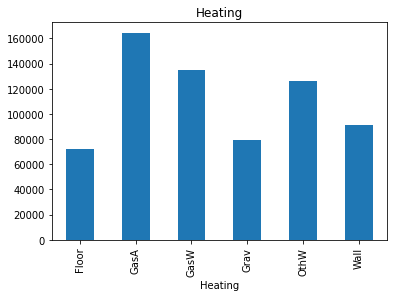

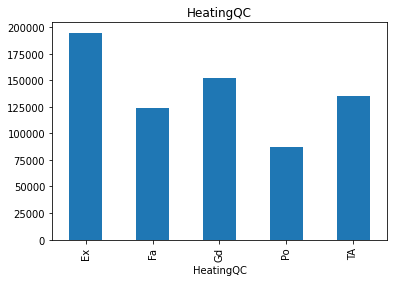

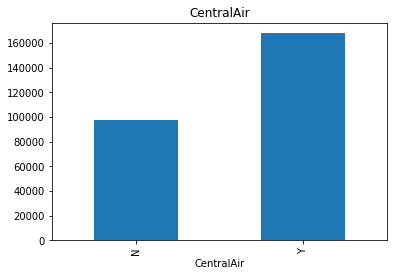

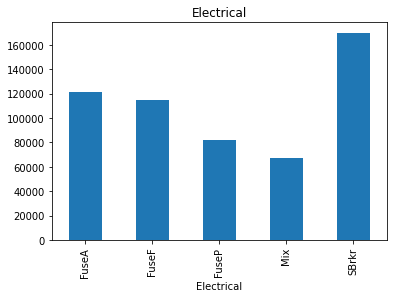

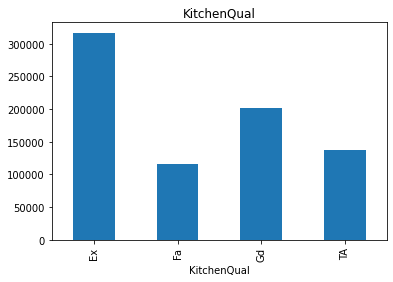

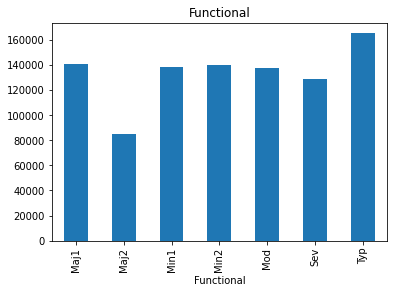

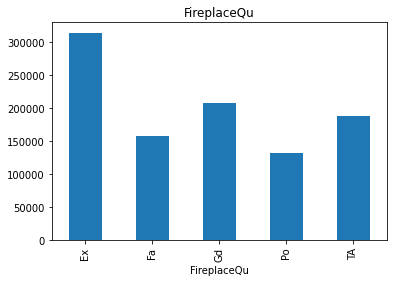

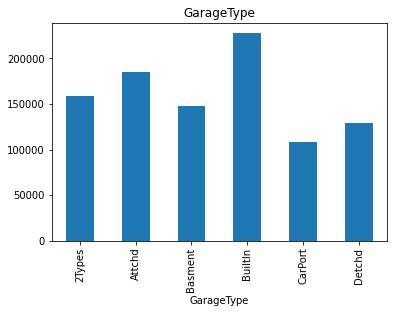

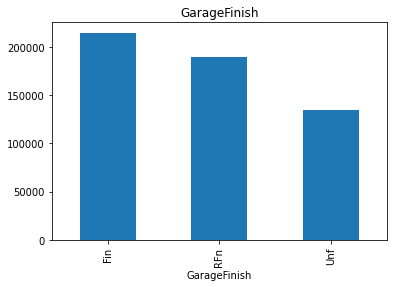

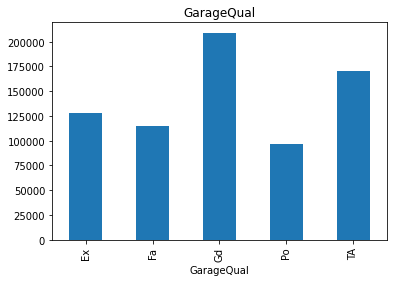

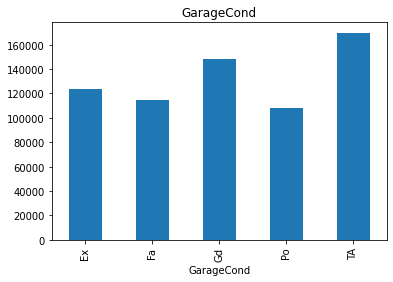

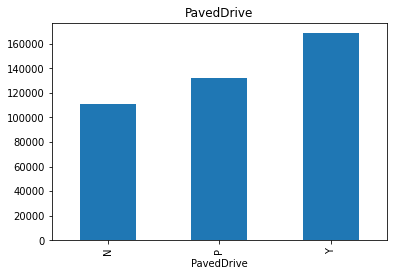

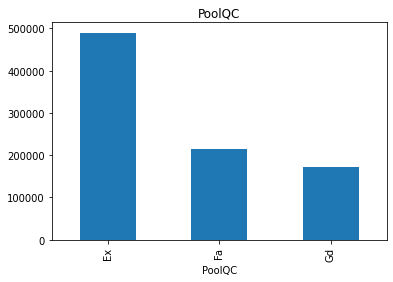

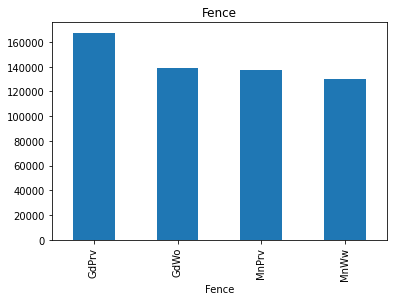

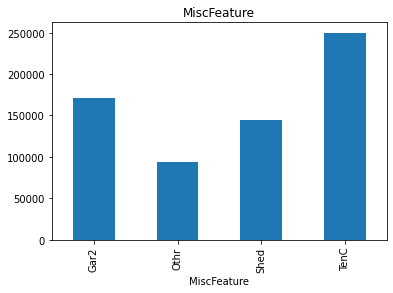

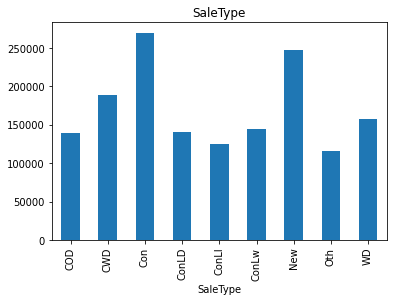

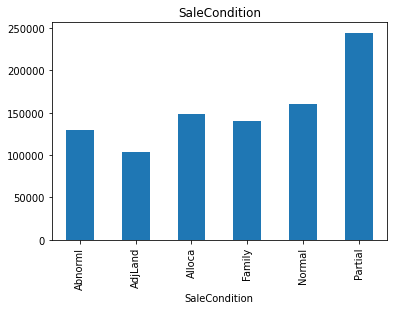

In [ ]:
# Since there are so many categorical features so we will handle it in feature engineering part

# finding relationship between categorical features and SalePrice

for feature in cat_feature:
  data=dataset.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(feature)
  plt.show()

# **Second Step is to do Feature Engineering**

-> Handling missing values

-> Handling numerical and categorical features

-> Transformation of features

-> Handling Outliers

**Missing Values** 

Firstly we will see the missing values in both numerical and categorical feature and then handle accordingly
Also we can do this for all dataset(train and test).

-> Checking for missing values in numerical features

In [ ]:
numerical_features_missing = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>0 and dataset[feature].dtypes!='O']

# printing numerical features which are missing with missing percentage

for feature in numerical_features_missing:
  print(feature)


LotFrontage
MasVnrArea
GarageYrBlt


In [ ]:
# Handling numerical nan values. We will replacing nan values with median as there are outliers in our dataset.

for feature in numerical_features_missing:
  median_val = dataset[feature].median()

  # Also we will be capturing nan values in new feature so that importance of each feature is preserved.

  dataset[feature+'_nan']=np.where(dataset[feature].isnull(),1,0)
  dataset[feature].fillna(median_val,inplace=True)

# checking missing values again
dataset[numerical_features_missing].isnull().sum()



LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

**Checking for missing values in categorical features**

In [ ]:
categorical_features_missing = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>0 and dataset[feature].dtypes=='O']

# printing categorical_features_missing

for feature in categorical_features_missing:
  print(feature)

Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [ ]:
# handling categorical missing values.
# Here we will be assigning a new label with name 'Missing' so that we can capture the importance of each values

def replace_categorical_missing(data,features):
  df=data.copy()
  df[features]=df[features].fillna('Missing')
  return df

dataset = replace_categorical_missing(dataset,categorical_features_missing)

dataset[categorical_features_missing].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [ ]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


**-> Handling numerical and categorical features**

In [ ]:
# date-time features

for feature in dt_feature:
  if feature!='YrSold':
    dataset[feature]=dataset['YrSold']-dataset[feature]

dataset[dt_feature].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


-> Numerical feature 

As numerical features are skewed so we will perform transformation (here log-normal transformation)

In [ ]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [ ]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [ ]:
for feature in continuous_feature:
  if feature!='SalePrice':
    dataset[feature]=np.log1p(dataset[feature])

dataset[continuous_feature].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,7.444833,6.308098,0.000000,4.127134,0.000000,0.0,208500
1,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,7.141245,6.133398,5.700444,0.000000,0.000000,0.0,181500
2,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,7.488294,6.411818,0.000000,3.761200,0.000000,0.0,223500
3,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,7.448916,6.466145,0.000000,3.583519,5.609472,0.0,140000
4,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,7.695758,6.729824,5.262690,4.442651,0.000000,0.0,250000


-> Handling categorical features

Firstly we will merge all the categories which are very very rare(1% of observations)

In [ ]:
cat_feature

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
len(dataset)

1460

In [ ]:
for feature in cat_feature:
  val=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
  val_data=val[val>0.01].index
  dataset[feature]=np.where(dataset[feature].isin(val_data),dataset[feature],'Rare')

dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,4.189655,9.042040,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,6.753438,GasA,...,6.751101,0,7.444833,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,6.308098,TA,TA,Y,0.000000,4.127134,0.000000,0,0.0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,4.394449,9.169623,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,7.141245,GasA,...,0.000000,0,7.141245,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,6.133398,TA,TA,Y,5.700444,0.000000,0.000000,0,0.0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,4.234107,9.328212,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,6.825460,GasA,...,6.765039,0,7.488294,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,6.411818,TA,TA,Y,0.000000,3.761200,0.000000,0,0.0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,4.110874,9.164401,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,6.293419,6.629363,GasA,...,6.629363,0,7.448916,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,6.466145,TA,TA,Y,0.000000,3.583519,5.609472,0,0.0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,4.442651,9.565284,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,6.196444,7.044033,GasA,...,6.960348,0,7.695758,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,6.729824,TA,TA,Y,5.262690,4.442651,0.000000,0,0.0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


**Encoding Categorical features**

-> As there are so many unique categories so we will be using target guided ordinal encoding

In [ ]:
for feature in cat_feature:
  labels=dataset.groupby(feature)['SalePrice'].mean().sort_values().index
  labels_dict={j:i for i,j in enumerate(labels)}
  dataset[feature]=dataset[feature].map(labels_dict)

dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,3,4.189655,9.042040,1,2,0,1,1,0,0,15,4,1,4,5,7,5,5,5,0,0,9,9,2,5.283204,2,3,4,3,3,1,6,6.561031,5,0.0,5.017280,6.753438,2,...,6.751101,0,7.444833,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,6.308098,2,3,2,0.000000,4.127134,0.000000,0,0.0,0,0,4,2,0,2,2008,2,3,208500,0,0,0
1,2,20,3,4.394449,9.169623,1,2,0,1,1,1,0,12,1,1,4,4,6,8,31,31,0,0,1,2,1,0.000000,1,3,2,3,3,4,4,6.886532,5,0.0,5.652489,7.141245,2,...,0.000000,0,7.141245,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,6.133398,2,3,2,5.700444,0.000000,0.000000,0,0.0,0,0,4,2,0,5,2007,2,3,181500,0,0,0
2,3,60,3,4.234107,9.328212,1,2,1,1,1,0,0,15,4,1,4,5,7,5,7,6,0,0,9,9,2,5.093750,2,3,4,3,3,2,6,6.188264,5,0.0,6.075346,6.825460,2,...,6.765039,0,7.488294,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,6.411818,2,3,2,0.000000,3.761200,0.000000,0,0.0,0,0,4,2,0,9,2008,2,3,223500,0,0,0
3,4,70,3,4.110874,9.164401,1,2,1,1,1,2,0,16,4,1,4,5,7,5,91,36,0,0,2,4,1,0.000000,1,3,1,2,4,1,4,5.379897,5,0.0,6.293419,6.629363,2,...,6.629363,0,7.448916,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,6.466145,2,3,2,0.000000,3.583519,5.609472,0,0.0,0,0,4,2,0,2,2006,2,0,140000,0,0,0
4,5,60,3,4.442651,9.565284,1,2,1,1,1,1,0,22,4,1,4,5,8,5,8,8,0,0,9,9,2,5.860786,2,3,4,3,3,3,6,6.486161,5,0.0,6.196444,7.044033,2,...,6.960348,0,7.695758,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,6.729824,2,3,2,5.262690,4.442651,0.000000,0,0.0,0,0,4,2,0,12,2008,2,3,250000,0,0,0


**-> feature scaling**

we will be using robust scaling as there are outliers in our dataset

In [ ]:
scale_data = [feature for feature in dataset.columns if feature not in ['Id','SalePrice']]
dataset[scale_data].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,60,3,4.189655,9.042040,1,2,0,1,1,0,0,15,4,1,4,5,7,5,5,5,0,0,9,9,2,5.283204,2,3,4,3,3,1,6,6.561031,5,0.0,5.017280,6.753438,2,4,...,6.753438,6.751101,0,7.444833,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,6.308098,2,3,2,0.000000,4.127134,0.000000,0,0.0,0,0,4,2,0,2,2008,2,3,0,0,0
1,20,3,4.394449,9.169623,1,2,0,1,1,1,0,12,1,1,4,4,6,8,31,31,0,0,1,2,1,0.000000,1,3,2,3,3,4,4,6.886532,5,0.0,5.652489,7.141245,2,4,...,7.141245,0.000000,0,7.141245,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,6.133398,2,3,2,5.700444,0.000000,0.000000,0,0.0,0,0,4,2,0,5,2007,2,3,0,0,0
2,60,3,4.234107,9.328212,1,2,1,1,1,0,0,15,4,1,4,5,7,5,7,6,0,0,9,9,2,5.093750,2,3,4,3,3,2,6,6.188264,5,0.0,6.075346,6.825460,2,4,...,6.825460,6.765039,0,7.488294,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,6.411818,2,3,2,0.000000,3.761200,0.000000,0,0.0,0,0,4,2,0,9,2008,2,3,0,0,0
3,70,3,4.110874,9.164401,1,2,1,1,1,2,0,16,4,1,4,5,7,5,91,36,0,0,2,4,1,0.000000,1,3,1,2,4,1,4,5.379897,5,0.0,6.293419,6.629363,2,3,...,6.869014,6.629363,0,7.448916,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,6.466145,2,3,2,0.000000,3.583519,5.609472,0,0.0,0,0,4,2,0,2,2006,2,0,0,0,0
4,60,3,4.442651,9.565284,1,2,1,1,1,1,0,22,4,1,4,5,8,5,8,8,0,0,9,9,2,5.860786,2,3,4,3,3,3,6,6.486161,5,0.0,6.196444,7.044033,2,4,...,7.044033,6.960348,0,7.695758,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,6.729824,2,3,2,5.262690,4.442651,0.000000,0,0.0,0,0,4,2,0,12,2008,2,3,0,0,0


In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust = scaler.fit_transform(dataset[scale_data])
df_robust

array([[ 0.2       ,  0.        , -0.21700129, ...,  0.        ,
         0.        ,  0.        ],
       [-0.6       ,  0.        ,  0.53827188, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2       ,  0.        , -0.05306506, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.4       ,  0.        , -0.16154223, ...,  0.        ,
         0.        ,  0.        ],
       [-0.6       ,  0.        , -0.05306506, ...,  0.        ,
         0.        ,  0.        ],
       [-0.6       ,  0.        ,  0.30329064, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
dataset = pd.concat([dataset[['Id','SalePrice']].reset_index(drop=True),pd.DataFrame(df_robust,columns=scale_data)],axis=1)

dataset.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,208500,0.2,0.0,-0.217001,-0.267660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.555556,0.0,0.0,0.0,1.0,0.5,0.0,-0.652174,-0.243243,0.0,0.0,0.285714,0.428571,1.0,1.034410,1.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.092710,0.0,0.0,-0.898157,-0.300181,...,-0.524119,1.024186,0.0,0.342891,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-1.0,-0.333333,0.0,-0.589744,0.0,0.0,0.243856,0.0,0.0,0.0,0.000000,0.205247,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0,0.0,0.0,0.0,0.0,0.0
1,2,181500,-0.6,0.0,0.538272,0.029682,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.222222,-3.0,0.0,0.0,0.0,0.0,3.0,-0.086957,0.459459,0.0,0.0,-0.857143,-0.571429,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,3.0,-0.333333,0.142255,0.0,0.0,-0.403505,0.492878,...,0.327547,0.000000,0.0,-0.327743,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.076923,0.0,0.0,-0.078320,0.0,0.0,0.0,1.111220,-0.769489,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.5,0.0,0.0,0.0,0.0,0.0
2,3,223500,0.2,0.0,-0.053065,0.399288,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.555556,0.0,0.0,0.0,1.0,0.5,0.0,-0.608696,-0.216216,0.0,0.0,0.285714,0.428571,1.0,0.997317,1.0,0.0,1.0,0.0,0.0,1.0,0.333333,0.035971,0.0,0.0,-0.074216,-0.152897,...,-0.365950,1.026301,0.0,0.438896,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.0,-0.538462,0.0,0.0,0.435133,0.0,0.0,0.0,0.000000,0.118822,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,4,140000,0.4,0.0,-0.507542,0.017513,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.666667,0.0,0.0,0.0,1.0,0.5,0.0,1.217391,0.594595,0.0,0.0,-0.714286,-0.285714,0.0,0.000000,0.0,0.0,-0.5,-1.0,1.0,0.0,-0.333333,-0.087072,0.0,0.0,0.095602,-0.553912,...,-0.270300,1.005718,0.0,0.351910,1.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.666667,-1.0,-0.512821,-1.0,1.0,0.535320,0.0,0.0,0.0,0.000000,0.076857,5.609472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.333333,-1.0,0.0,-3.0,0.0,0.0,0.0
4,5,250000,0.2,0.0,0.716039,0.951802,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.333333,0.0,0.0,0.0,1.0,1.0,0.0,-0.586957,-0.162162,0.0,0.0,0.285714,0.428571,1.0,1.147496,1.0,0.0,1.0,0.0,0.0,2.0,0.333333,0.081314,0.0,0.0,0.020085,0.294081,...,0.114059,1.055930,0.0,0.897190,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.5,0.0,0.0,0.333333,0.0,-0.512821,0.0,1.0,1.021588,0.0,0.0,0.0,1.025886,0.279765,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data=dataset.copy()

data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,208500,0.2,0.0,-0.217001,-0.267660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.555556,0.0,0.0,0.0,1.0,0.5,0.0,-0.652174,-0.243243,0.0,0.0,0.285714,0.428571,1.0,1.034410,1.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.092710,0.0,0.0,-0.898157,-0.300181,...,-0.524119,1.024186,0.0,0.342891,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-1.0,-0.333333,0.0,-0.589744,0.0,0.0,0.243856,0.0,0.0,0.0,0.000000,0.205247,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0,0.0,0.0,0.0,0.0,0.0
1,2,181500,-0.6,0.0,0.538272,0.029682,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.222222,-3.0,0.0,0.0,0.0,0.0,3.0,-0.086957,0.459459,0.0,0.0,-0.857143,-0.571429,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,3.0,-0.333333,0.142255,0.0,0.0,-0.403505,0.492878,...,0.327547,0.000000,0.0,-0.327743,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.076923,0.0,0.0,-0.078320,0.0,0.0,0.0,1.111220,-0.769489,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.5,0.0,0.0,0.0,0.0,0.0
2,3,223500,0.2,0.0,-0.053065,0.399288,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.555556,0.0,0.0,0.0,1.0,0.5,0.0,-0.608696,-0.216216,0.0,0.0,0.285714,0.428571,1.0,0.997317,1.0,0.0,1.0,0.0,0.0,1.0,0.333333,0.035971,0.0,0.0,-0.074216,-0.152897,...,-0.365950,1.026301,0.0,0.438896,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.0,-0.538462,0.0,0.0,0.435133,0.0,0.0,0.0,0.000000,0.118822,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,4,140000,0.4,0.0,-0.507542,0.017513,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.666667,0.0,0.0,0.0,1.0,0.5,0.0,1.217391,0.594595,0.0,0.0,-0.714286,-0.285714,0.0,0.000000,0.0,0.0,-0.5,-1.0,1.0,0.0,-0.333333,-0.087072,0.0,0.0,0.095602,-0.553912,...,-0.270300,1.005718,0.0,0.351910,1.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.666667,-1.0,-0.512821,-1.0,1.0,0.535320,0.0,0.0,0.0,0.000000,0.076857,5.609472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.333333,-1.0,0.0,-3.0,0.0,0.0,0.0
4,5,250000,0.2,0.0,0.716039,0.951802,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.333333,0.0,0.0,0.0,1.0,1.0,0.0,-0.586957,-0.162162,0.0,0.0,0.285714,0.428571,1.0,1.147496,1.0,0.0,1.0,0.0,0.0,2.0,0.333333,0.081314,0.0,0.0,0.020085,0.294081,...,0.114059,1.055930,0.0,0.897190,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.5,0.0,0.0,0.333333,0.0,-0.512821,0.0,1.0,1.021588,0.0,0.0,0.0,1.025886,0.279765,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0


# **Creating train and test dataset**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(dataset.drop(['Id','SalePrice'],axis=1),dataset['SalePrice'],test_size=0.2,random_state=0)

In [ ]:
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
618,-0.6,0.0,0.967588,0.489491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.222222,0.0,0.0,0.0,0.0,1.5,0.0,-0.760870,-0.378378,2.0,0.0,0.428571,0.571429,1.0,1.197444,2.0,0.0,1.0,1.0,0.0,2.0,0.333333,-0.313573,0.0,0.0,1.020832,1.243374,0.0,0.0,...,1.140721,0.0,0.0,0.490214,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.5,0.0,0.0,0.666667,0.0,-0.717949,-1.0,1.0,0.879659,0.0,0.0,0.0,0.000000,0.338501,0.000000,0.0,5.56452,0.0,0.0,0.0,0.0,0.0,0.333333,-0.5,1.0,1.0,0.0,0.0,0.0
870,-0.6,0.0,-0.507542,-0.843461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.222222,1.0,0.0,0.0,0.0,-0.5,0.0,0.260870,0.891892,2.0,0.0,-0.857143,-0.571429,0.0,0.000000,0.0,0.0,0.0,-1.0,0.0,0.0,0.000000,-0.905951,0.0,0.0,0.487615,-0.211458,0.0,-0.5,...,-0.428839,0.0,0.0,-1.088578,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-0.5,0.0,-1.0,-0.333333,-1.0,0.487179,-1.0,-1.0,-0.816091,0.0,0.0,0.0,0.000000,-0.769489,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.666667,0.5,0.0,0.0,0.0,0.0,0.0
92,-0.4,0.0,0.538272,0.799875,0.0,-2.0,1.0,2.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,-0.5,2.0,1.152174,-0.297297,0.0,0.0,-0.714286,-0.714286,0.0,0.000000,0.0,-2.0,-0.5,0.0,0.0,0.0,-0.333333,0.094209,0.0,0.0,-0.833845,-0.253005,0.0,0.0,...,-0.263462,0.0,0.0,-0.922229,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-0.5,0.0,-1.0,-0.333333,-1.0,1.538462,-1.0,0.0,-0.193876,0.0,0.0,0.0,0.000000,-0.769489,3.806662,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.666667,0.5,0.0,0.0,0.0,0.0,0.0
817,-0.6,0.0,0.000000,0.783245,0.0,0.0,1.0,0.0,0.0,4.0,0.0,-0.111111,0.0,0.0,0.0,0.0,1.0,0.0,-0.630435,-0.216216,2.0,0.0,0.428571,0.571429,1.0,0.979734,1.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.175628,0.0,0.0,-0.241299,0.936535,0.0,0.0,...,0.967139,0.0,0.0,0.315611,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,1.0,0.666667,0.0,-0.564103,0.0,1.0,1.067287,0.0,0.0,0.0,0.978047,0.197503,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,1.0,0.0,0.0
302,-0.6,0.0,1.956935,0.859120,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.555556,0.0,0.0,0.0,0.0,0.5,0.0,-0.652174,-0.270270,0.0,0.0,0.285714,0.428571,1.0,0.982344,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,-0.905951,0.0,0.0,0.911250,0.901037,0.0,0.0,...,0.765869,0.0,0.0,0.113157,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.0,-0.589744,0.0,1.0,1.036947,0.0,0.0,0.0,1.198972,0.271279,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,-1.666667,-1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
529,-0.6,0.0,0.000000,2.883615,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,-2.0,0.326087,0.486486,2.0,0.0,-0.714286,0.142857,2.0,0.000000,1.0,0.0,1.0,-1.0,0.0,0.0,-1.333333,0.175752,0.0,0.000000,0.416608,1.469352,0.0,-1.0,...,1.841062,0.000000,0.0,1.194674,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.5,-4.0,1.0,0.333333,0.0,0.102564,0.0,0.0,0.015273,0.0,0.0,0.0,0.000000,-0.769489,5.303305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-0.5,0.0,-1.0,1.0,1.0,0.0
491,0.0,0.0,0.492458,0.002826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.222222,-4.0,0.0,0.0,-3.0,0.0,2.0,0.652174,1.135135,0.0,0.0,-0.714286,-0.714286,0.0,0.000000,0.0,0.0,0.0,-1.0,0.0,0.0,-1.000000,0.007530,-2.0,5.111988,-0.540580,-0.423114,0.0,-1.0,...,-0.277160,0.975675,0.0,0.165537,1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-0.5,0.0,1.0,0.333333,0.0,0.948718,-1.0,-1.0,-1.274449,0.0,0.0,0.0,0.000000,-0.769489,3.496508,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.666667,-1.0,0.0,0.0,0.0,0.0,0.0
459,0.0,0.0,0.000000,-0.701361,0.0,0.0,1.0,-1.0,0.0,2.0,0.0,-0.777778,0.0,0.0,0.0,-3.0,-0.5,-1.0,0.521739,1.216216,0.0,0.0,-0.857143,-0.571429,-1.0,0.996112,0.0,0.0,0.0,-1.0,0.0,0.0,-0.666667,-0.110535,0.0,0.000000,0.072224,-0.684991,0.0,-1.0,...,-0.229589,0.821658,0.0,-0.433424,1.0,0.0,-1.0,0.0,0.0,0.0,1.0,-0.5,0.0,0.0,0.333333,-1.0,0.794872,-1.0,-1.0,-0.570584,0.0,0.0,0.0,0.000000,-0.769489,5.517453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.5,0.0,0.0,1.0,0.0,0.0
279,0.2,0.0,0.672394,0.125976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.777778,0.0,0.0,0.0,1.0,0.5,0.0,-0.086957,0.459459,2.0,0.0,0.000000,0.000000,1.0,1.116756,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,0.003328,0.0,0.000000,0.369457,0.320674,0.0,0.0,...,0.135038,1.026301,0.0,0.712910,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.0,0.076923,1.0,0.0,0.093443,0.0,0.0,0.0,1.104588,0.357239,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0
655,2.2,-2.0,-4.268637,-4.031304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.888889,0.0,0.0,-2.0,1.0,0.0,0.0,0.086957,0.675676,0.0,0.0,-0.142857,0.142857,1.0,1.164067,0.0,0.0,0.0,-1.0,0.0,0.0,0.000000,-0.905951,0.0,0.000000,0.073706,-1.298412,0.0,-1.0,...,-1.596119,0.962141,0.0,-0.647087,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-0.333333,-1.0,0.282051,-1.0,-1.0,-1.099377,0.0,0.0,0.0,0.000000,-0.769489,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,1.0,0.0,-2.0,0.0,0.0,0.0


# **Model Selection**

In [ ]:
import xgboost
regressor=xgboost.XGBRegressor()

In [ ]:
# hyperparameter optimization

n_estimators = [100,200,300,400,500,600,700,800,900,1000,1200,1500]
max_depth = [2,3,5,8,10,15]
learning_rate=[0.05,0.1,0.15,0.20,0.25]
min_child_weight=[1,2,3,4,5]
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
# setting up random search

from sklearn.model_selection import RandomizedSearchCV

random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=100,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=0)

In [ ]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   12.4s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  9.6min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 15.4min
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed: 16.8min finished


[07:58:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                     

In [ ]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=5, missing=None, n_estimators=800,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
regressor=xgboost.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=5, missing=None, n_estimators=800,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
regressor.fit(x_train,y_train)

[08:00:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=5, missing=None, n_estimators=800,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

print(score)


0.8953304691007953


This is the final r2_score which is coming from XGboost.